# CASO DE ESTUDIO: EnergyINC

Se me ha asignado la tarea de estudiar las posibles causas de finalización del contrato de nuestros clientes, así como que posibles medidas se podrían llevar a cabo para conseguir que permanezcan con nosotros.

## ETAPAS DEL PROYECTO

|FASES      |<div align = 'left'>TAREAS</div>|
|------------|--------------------------------|
|<div align="center">1. Definir el proyecto y <br>los objetivos</div>|<ul><li>Formular una declaración del problema</li><li>Definir los objetivos del proyecto y las medidas a llevar a cabo</li></ul>     |
|<div align="center">2. Extraer y preparar los datos</div>|<ul><li>Determinar si los datos cumplen con *ROCC* (Realibility, Origin, Comprehensiveness, Current relevance and Cited)</li><li>Verificar la integridad de los datos</li><li>Identificar como los datos se comportan ante nuestro problema de negocio</li></ul>|
|<div align="center">3. Procesar los datos <br>para el análisis</div>|<ul><li>Definir las herramientas necesarias para el análisis de los datos</li><li>Comprobar si hay datos sucios y garantizar la integridad de los datos</li><li>Verificar que los datos están limpios y listos para el análisis</li></ul>|
|<div align="center">4. Análisis de los datos</div>|<ul><li>Organizar los datos para llevar a cabo el análisis</li><li>Llevar a cabo un breve análisis de los datos</li><li>Identificar características de los datos gracias al análisis</li></ul>|
|<div align="center">5. Preparación del modelo</div>|<ul><li>Llevar a cabo las transformaciones necesarias de los datos para implementar el modelo</li><li>Normalizar los datos para poder trabajar con los distintos modelos</li></ul>|
|<div align="center">6. Entrenamiento del modelo</div>|<ul><li>Identificar la clasificación de los datos (balanceada o imbalanceada)</li><li>Dividir la base de datos mediante *train_test_split* para evitar el *overfitting*</li><li>Probar con distintos modelos de Machine Learning</li><li>Evaluar los resultados de cada modelo a través de distintas métricas</li><li>En caso de ser necesario, ajustar sus hiperparámetros o incluso etapas previas</li><li>Escoger el modelo con el que vamos a trabajar</li><li>Testear este modelo en un caso real</li></ul>|
|<div align="center">7. Consideraciones a partir<br> de nuestro análisis</div>|<li>Informar de los distintos problemas que hemos encontrado a la hora de trabajar con los datos</li><li>Comunicar a la empresa aquellas dudas que puedan ayudarnos a la hora de mejorar el análisis</li></ul>|
|<div align="center">8. Pasos a seguir a partir<br> de nuestras conclusiones</div>|<li>Aportar las conclusiones dadas por el modelo</li><li>Informar sobre las medidas que debe tomar la empresa a la hora de resolver el problema de negocio</li></ul>|

## 1. DEFINIR EL PROYECTO Y LOS OBJETIVOS

#### PROYECTO

En los últimos tiempos, la empresa EnergyINC viene sufriendo más finalizaciones de contrato por parte de sus clientes que la media de las empresas del sector. Esto se debe a la liberización de la energía en el mercado europeo que ha traído consigo un aumento de la competencia. Este problema es aún más claro en el sector PYMES y por eso se nos ha pedido que le otorguemos máxima prioridad a dicho sector.

#### OBJETIVOS

* Averiguar las principales causas de abandono de los clientes. <br>
* Buscar qué acciones preventivas puede llevar a cabo la empresa para parar esta tendencia. <br>
* Comprobar si aplicar un 20% de descuento cambiaría de idea a aquellos clientes que estén pensando en abandonar. 

## 2. EXTRAER Y PREPARAR LOS DATOS

Antes de preparar los datos, debemos conocer bien nuestros datos y comprobar su calidad. Veamos si cumplen las siguientes características:
* **Confiabilidad.** En este caso los datos han sido proporcionados por la propia empresa mientras que están estructurados en diferentes archivos .csv. Hemos combinado dichos archivos posteriormente debido a que los datos de éstos están relacionados ente sí y nos permite un estudio mucho más eficiente de los datos. <br>
* **Origen.** Podemos suponer que los datos aportados son fehacientes, pues nos los suministra directamente la empresa.<br>
* **Integralidad.** Por otro lado, a la hora de analizar y entender los datos, algunos de los nombres de las columnas no son demasiado descriptivos, lo que ha conllevado una pequeña labor de búsqueda para comprenderlos mejor. <br>
* **Relevancia actual.** También debemos tener en cuenta que el estudio pedido sería útil en un caso ficticio en el que las medidas que vamos a llevar a cabo sean en el año 2016 (fecha cercana a la que se recogieron los datos). Sin embargo, en caso de que quisiéramos obtener conclusiones para el negocio actual sería irreal hacerlo a partir de los datos dados, pues lo más probable es que estén desactualizados y no se correspondan con el mercado actual. <br>

#### IMPORTAR LAS LIBRERÍAS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, brier_score_loss, roc_curve, auc, precision_recall_curve
# from sklearn.tree import plot_tree
import scipy.sparse as sp
import seaborn as sns

#### IMPORTAR LAS DISTINTAS BASES DE DATOS

Vamos a ordenar todas las bases de datos por la columna *contract_id* (y aquellas que contengan también facturas por *reference_date*), para que así todos los datos sean concordantes, y no haya problemas a la hora de juntar las tablas.

In [3]:
training_data = pd.read_csv("Aily - DS Challange - Churn - Data/aily_case_training_data.csv")
training_data = training_data.sort_values(by = ['contract_id'], ascending = True) 
# training_data.head()
training_hist_data = pd.read_csv("Aily - DS Challange - Churn - Data/aily_case_training_hist_data.csv")
training_hist_data = training_hist_data.sort_values(by = ['contract_id', 'reference_date'], ascending = True)
# training_hist_data.head()
training_output = pd.read_csv("Aily - DS Challange - Churn - Data/aily_case_training_output.csv")
training_output = training_output.sort_values(by = ['contract_id'], ascending = True)
# training_output.head()
test_data = pd.read_csv("Aily - DS Challange - Churn - Data/aily_case_test_data.csv")
test_data = test_data.sort_values(by = ['contract_id'], ascending = True)
# test_data.head()
test_hist_data = pd.read_csv("Aily - DS Challange - Churn - Data/aily_case_test_hist_data.csv")
test_hist_data = test_hist_data.sort_values(by = ['contract_id', 'reference_date'], ascending = True)
# test_hist_data.head()

#### RESUMEN DE LAS BASES DE DATOS

Para hacernos una idea de la estructura de las bases de datos que tenemos, podemos hacer un resumen de las principales características estadísticas de las distintas bases de datos.

In [3]:
training_data.describe()

,campaing_code_elect,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,...,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,subscribed_power
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,2.287598e+05,1.631417e+04,1.456158e+04,233.557006,437.905517,4694.264197,315.642664,1341.141149,1732.826515,...,0.171363,0.027140,29.222152,135.847649,34.922245,30.168604,1.347788,108.006940,5.030629,25.794323
std,NaN,7.979617e+05,9.078917e+04,6.162381e+04,451.618566,846.757993,6637.202134,695.291186,2282.848218,4776.320176,...,0.033103,0.024919,3.498759,342.430203,36.847914,39.245805,1.459808,181.711200,1.676101,27.256907
min,NaN,-1.471120e+05,-1.552000e+03,-6.837900e+04,-253.791433,-475.843867,-3062.455913,0.000000,-9441.942657,-77792.199408,...,0.000000,0.000000,-0.082017,-6260.442573,-817.060399,-865.485927,1.000000,-2055.717345,1.000000,1.251901
25%,NaN,6.934750e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1416.771805,0.000000,290.359682,0.000000,...,0.145307,0.000000,27.257522,0.000000,18.594288,16.799137,1.000000,25.749792,4.000000,15.648757
50%,NaN,1.800350e+04,0.000000e+00,6.730000e+02,113.324335,212.476400,2675.593752,64.419466,667.109333,343.413309,...,0.180165,0.044162,29.744311,30.799304,32.788758,29.479323,1.000000,59.298348,5.000000,17.346335
75%,NaN,5.897475e+04,0.000000e+00,3.087000e+03,275.520247,516.584102,5194.723932,348.103932,1523.041847,1811.777753,...,0.184536,0.050658,29.744311,151.063089,46.081498,41.667483,1.000000,136.656729,6.000000,24.787632
max,NaN,1.890300e+07,2.141273e+06,3.396121e+06,8738.870635,16384.863529,99235.655140,14775.946969,58725.903411,159328.330681,...,0.345452,0.100446,39.902662,10419.598896,582.455204,526.663496,32.000000,12174.122227,16.000000,625.950297


Observando esta tabla, podemos ver como en casi todas las columnas de la base de datos existen valores negativos. Este hecho es algo que me sorprendió en un primer momento, puesto que me extrañó bastante encontrarme con precios de facturas negativos o incluso con consumos tanto de elecricidad como de gas negativos. Una vez que he indagado un poco más acerca de esto, una posible explicación que he encontrado, aunque desconozco si aplica o no a este caso, es que existen usuarios de la red eléctrica que tienen instalados generadores de energía eléctrica (la mayoría de ellos de energías renovables). Y en caso de que produzcan más energía de la que consumen, este excedente es vertido a la red, por lo que el suministrador de energía les compensa económicamente y permite entonces que existan facturas negativas. Sin embargo, en el caso de la columna *fcst_bill_meter_rent_12m*, la cual indica la factura prevista para los próximos 12 meses del alquiler del contador, me he encontrado con que también existen valores negativos. No he encontrado explicación a este hecho, pues el alquiler del contador suele ser un precio fijo preestablecido, así que en principio considero esto como un fallo a la hora de recoger los datos.

In [4]:
test_data.describe()

,campaing_code_elect,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,...,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,current_paid_consumption,gross_margin_power_elect,net_margin_power_elect,number_active_products,total_net_margin,customer_antiquity_in_years,subscribed_power
count,0.0,4.024000e+03,4.024000e+03,4024.000000,877.000000,877.000000,877.000000,877.000000,4024.000000,4024.000000,...,4000.000000,4000.000000,4000.000000,4024.000000,4022.000000,4022.000000,4024.000000,4021.000000,4024.000000,4023.000000
mean,NaN,2.119699e+05,2.299044e+04,17146.780318,316.021351,432.723204,4633.504948,300.641042,1784.063314,1841.376182,...,0.152941,0.037689,35.708261,166.137377,28.091727,24.808974,1.350149,151.038333,4.995775,22.909018
std,NaN,7.143149e+05,1.292644e+05,64574.963608,805.893978,1103.498303,7393.492128,988.801402,3081.759759,4887.219522,...,0.029669,0.034702,4.110520,426.499093,30.493782,38.251639,1.449767,218.660486,1.686233,24.705208
min,NaN,-8.688500e+04,-3.056000e+03,-18699.000000,0.000000,0.000000,0.000000,-2.581793,-5625.324015,-20605.263539,...,0.000000,0.000000,0.000000,-2176.013462,-659.149935,-1163.794735,1.000000,-2072.666554,2.000000,0.000000
25%,NaN,5.998750e+03,0.000000e+00,0.000000,0.000000,0.000000,1299.761162,0.000000,372.651785,0.000000,...,0.129402,0.000000,33.269175,0.000000,15.006185,14.168616,1.000000,35.145690,4.000000,13.986045
50%,NaN,1.663350e+04,0.000000e+00,822.500000,134.353889,183.968726,2532.287387,46.002860,879.403004,364.104481,...,0.160444,0.061428,36.304427,38.567131,26.296671,24.964035,1.000000,83.468374,5.000000,15.503252
75%,NaN,5.537650e+04,0.000000e+00,3546.250000,352.408976,482.548222,4879.161632,289.741431,2050.299373,2013.297618,...,0.164337,0.070760,36.304427,190.559412,35.910105,34.099532,1.000000,198.225069,6.000000,22.287043
max,NaN,6.812156e+06,2.011326e+06,667104.000000,15862.315013,21720.025431,86672.978815,22565.984152,67159.961507,162056.994976,...,0.307638,0.120341,48.557097,15203.389438,623.838332,593.208548,32.000000,2995.724843,13.000000,456.504524


In [109]:
test_data['net_margin_power_elect'].describe()

count    4022.000000
mean       24.808974
std        38.251639
min     -1163.794735
25%        14.168616
50%        24.964035
75%        34.099532
max       593.208548
Name: net_margin_power_elect, dtype: float64

Los datos de esta tabla podemos ver como se asemejan bastante al resumen que hemos obtenido de la base de datos *training_data*, por lo que las conclusiones que obtuvimos en su momento para dicha tabla se podrían interpolar también para esta.

En ambos resúmenes observamos que la columna *campaing_code_elect* únicamente contiene valores nulos, por lo que no aporta ningún tipo de información significativa ni en el estudio de los datos ni a la hora de obtener conclusiones, por lo tanto la eliminaremos de ambas bases de datos. 

In [4]:
training_data = training_data.drop('campaing_code_elect', axis = 1)
test_data = test_data.drop('campaing_code_elect', axis = 1)
# training_data.head()
# test_data.head()

In [6]:
training_hist_data.describe()

,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.127477,0.043164,0.039137,39.077768,8.084069,4.893413
std,0.022710,0.039691,0.046303,4.904798,9.714639,5.899199
min,0.000000,0.000000,0.000000,-0.160349,-0.073866,-0.049402
25%,0.113901,0.000000,0.000000,36.735692,0.000000,0.000000
50%,0.132036,0.067813,0.000000,39.926855,0.000000,0.000000
75%,0.137101,0.080741,0.092463,40.087205,18.392143,12.300087
max,0.253795,0.182288,0.145403,53.616556,27.574100,13.233853


Con este resumen, de nuevo podemos observar que existen precios negativos, los cuales vamos a suponer que siguen el mismo principio que hemos explicado anteriormente. Además vemos que existe un 25% de los clientes cuyo *price_energy_2nd_period* es igual o menor a 0, mientras que hasta un 50% de los clientes tienen *price_energy_3rd_period*, *price_power_2nd_period* y *price_power_3rd_period* iguales o menores a 0, lo que se puede interpretar como un menor número de clientes que en su factura incluyen los tres períodos. Además, podemos observar como las columnas que marcan *price_power* tienen unas desviaciones típicas bastante grandes, es decir, existe una gran variabilidad ente los datos de dichas columnas. Podemos también observar como los precios de la energía y la potencia son más altos en el primer período del día y van decreciendo a medida que avanzan las horas.

In [7]:
test_hist_data.describe()

,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
count,47934.000000,47934.000000,47934.000000,47934.000000,47934.000000,47934.000000
mean,0.127577,0.042928,0.039116,39.112117,8.087181,4.903335
std,0.022690,0.039576,0.046234,4.749264,9.706591,5.903200
min,0.000000,0.000000,0.000000,-0.146943,-0.073866,-0.049402
25%,0.113901,0.000000,0.000000,36.735692,0.000000,0.000000
50%,0.132036,0.067753,0.000000,39.926855,0.000000,0.000000
75%,0.137101,0.080656,0.092463,40.087205,18.392143,12.300087
max,0.253795,0.134539,0.128754,53.616556,27.574098,13.233853


Vemos de nuevo en este resumen, al igual que el observado para *training_hist_data* que los clientes prefieren contratos que contengan 2 tramos diarios ya que serán en los que principalmente consuman la electricidad. También vemos como de nuevo tanto el precio de la energía como el de la potencia van decreciendo a medida que avanza el día.

## 3. PROCESAR LOS DATOS PARA EL ANÁLISIS

### ELEGIR LAS HERRAMIENTAS ADECUADAS

Las bases de datos ya han sido cargadas y con la breve exploración que hemos realizado hasta ahora de las mismas, ya que posteriormente vamos a necesitar diferentes realizar diferentes cálculos con los datos y posibles transformaciones de las distintas tablas, la mejor opción para manipular todos estos datos es trabajar con Python en Jupyter Notebook, que nos permite una mejor visualización de los mismos. <br> Aunque Python ofrece buenas herramientas de visualización, posteriormente las complementaremos con una presentación más visual en PowerPoint.

### COMPROBACIÓN DE DATOS SUCIOS Y GARANTÍA DE LA INTEGRIDAD DE LOS DATOS

A partir de los resúmenes que hemos visto más arriba, basándonos en las distintas características podemos decidir qué decisiones debemos de tomar para limpiar las bases de datos como por ejemplo si necesitamos eliminar columnas que no aporten demasiada información, cambiar las columnas que contienen fechas (preferiblemente a deltas de tiempo) o los valores que marquen True o False a booleano si no lo estuvieran.

##### VALORES BOOLEANOS

In [5]:
training_data['client_got_gas'] = training_data['client_got_gas'].astype(bool)
test_data['client_got_gas'] = test_data['client_got_gas'].astype(bool)

##### FECHAS EN FORMATO CORRECTO Y DELTAS DE TIEMPO

Observando las bases de datos *training_data* y *test_data*, vemos que ambas contienen una columna *customer_antiquity_in_years*, la cual indica el número de años que el cliente lleva con nosotros. Realmente con esta columna sería suficiente para tener en cuenta la antigüedad de los clientes, pero para aumentar la precisión, sustituiremos esta columna con la antigüedad del cliente en días.

In [6]:
# BASE DE DATOS training_data
# Pasamos las columnas con fechas a tipo fecha
training_data['contract_activation_date'] = pd.to_datetime(training_data['contract_activation_date'])
training_data['contract_end_date'] = pd.to_datetime(training_data['contract_end_date'])
training_data['contract_fist_act_date'] = pd.to_datetime(training_data['contract_fist_act_date'])
training_data['contract_last_mod_date'] = pd.to_datetime(training_data['contract_last_mod_date'])
training_data['contract_renewal_date'] = pd.to_datetime(training_data['contract_renewal_date'])
# Modificamos la columna customer_antiquity_in_years 
training_data['customer_antiquity_in_years'] = training_data['contract_end_date'] - training_data['contract_activation_date']
training_data = training_data.rename(columns={'customer_antiquity_in_years': 'customer_antiquity_in_days'})

# BASE DE DATOS test_data
# Pasamos las columnas con fechas a tipo fecha
test_data['contract_activation_date'] = pd.to_datetime(test_data['contract_activation_date'])
test_data['contract_end_date'] = pd.to_datetime(test_data['contract_end_date'])
test_data['contract_fist_act_date'] = pd.to_datetime(test_data['contract_fist_act_date'])
test_data['contract_last_mod_date'] = pd.to_datetime(test_data['contract_last_mod_date'])
test_data['contract_renewal_date'] = pd.to_datetime(test_data['contract_renewal_date'])
# Modificamos la columna customer_antiquity_in_years 
test_data['customer_antiquity_in_years'] = test_data['contract_end_date'] - test_data['contract_activation_date']
test_data = test_data.rename(columns={'customer_antiquity_in_years': 'customer_antiquity_in_days'})

# BASE DE DATOS training_hist_data
# Pasamos las columnas con fechas a tipo fecha
training_hist_data['reference_date'] = pd.to_datetime(training_hist_data['reference_date'])

# BASE DE DATOS test_hist_data
# Pasamos las columnas con fechas a tipo fecha
test_hist_data['reference_date'] = pd.to_datetime(test_hist_data['reference_date'])

##### CLIENTES DADOS DE ALTA PREVIAMENTE

En las bases de datos *training_data* y *test_data*, la columna *contract_fist_act_date* nos muestra la fecha del primer contrato del cliente. Por si sola esta columna no nos aporta demasiada información, pues no sabemos la fecha en la que el cliente se dió de baja, así que teniendo en cuenta también la columna *contract_activation_date* vamos a añadir una columna booleana que nos diga si el cliente había sido ya o no cliente de la empresa anteriormente. Esta nueva columna reemplazará a la columna existente *contract_fist_act_date*.

In [7]:
# BASE DE DATOS training_data
new_column = []
for el1, el2 in zip(training_data['contract_activation_date'],training_data['contract_fist_act_date']):
    if pd.notna(el2) and el1 == el2:
        new_column.append(True)
    else:
        new_column.append(False)
training_data['contract_fist_act_date'] = new_column
training_data = training_data.rename(columns={'contract_fist_act_date': 'previously_registered'})

# BASE DE DATOS test_data
new_column = []
for el1, el2 in zip(test_data['contract_activation_date'],test_data['contract_fist_act_date']):
    if pd.notna(el2) and el1 == el2:
        new_column.append(True)
    else:
        new_column.append(False)
test_data['contract_fist_act_date'] = new_column
test_data = test_data.rename(columns={'contract_fist_act_date': 'previously_registered'})

## 4. ANÁLISIS DE LOS DATOS

### ORGANIZAR LOS DATOS PARA EL ANÁLISIS

Queremos juntar ahora las bases de datos *training_data* con *training_hist_data*. Esta última tabla contiene información sobre los precios en las facturas de cada cliente a lo largo de los 12 meses del año 2015. Para conservar toda la información y no perder datos que pueden ser relevantes a la hora de entrenar el modelo, he decidido añadir todos los datos de esta segunda tabla diferenciándolos por meses.

In [8]:
# BASE DE DATOS X_train
for i in range(12):
    if i<9:
        training_month = training_hist_data[training_hist_data['reference_date'] == f'2015-0{i+1}-01']
        
        # Borramos la columna reference_date para que no de problemas a la hora de mergear las tablas
        training_month = training_month.drop('reference_date', axis = 1)
        
        training_data = training_data.merge(training_month, how = 'left', on = 'contract_id', suffixes=("", f"_0{i+1}"))
        
    else:
        training_month = training_hist_data[training_hist_data['reference_date'] == f'2015-{i+1}-01']
        
        # Borramos la columna reference_date para que no de problemas a la hora de mergear las tablas
        training_month = training_month.drop('reference_date', axis = 1)
        
        training_data = training_data.merge(training_month, how = 'left', on = 'contract_id', suffixes=("", f"_{i+1}"))
        # Es más conveniente en este caso que merge tenga en cuenta los índices de la tabla de la izquierda, pues es a la que
        # le estamos añadiendo la información y por tanto es de la que queremos conservar todas las entradas, para que además
        # así X_train sea del mismo tamaño que y_train
# training_data.head(10)

# El nº de columnas de la base de datos debe ser la suma de las columnas de training_data + los 6 precios de cada uno de los 12 meses
# training_data.shape --> (16096, 103)
X_train = training_data 
y_train = training_output
# X_train

Para hacernos una idea más general de los precios de la energía y la potencia en este año 2015, vamos a añadir dos columnas que reflejen la media de ambos precios respectivamente. Una vez hecho esto, ya tendríamos en principio los datos necesarios para entrenar posteriormente nuestro modelo, aunque todavía debemos hacer algunas revisiones.

In [9]:
lista_energy = []
for i in range(12):
    if i == 0:
        lista_energy.append('price_energy_1st_period')
        lista_energy.append('price_energy_2nd_period')
        lista_energy.append('price_energy_3rd_period')
    elif i<9: 
        lista_energy.append(f'price_energy_1st_period_0{i+1}')
        lista_energy.append(f'price_energy_2nd_period_0{i+1}')
        lista_energy.append(f'price_energy_3rd_period_0{i+1}')
    else:
        lista_energy.append(f'price_energy_1st_period_{i+1}')
        lista_energy.append(f'price_energy_2nd_period_{i+1}')
        lista_energy.append(f'price_energy_3rd_period_{i+1}')
lista_power = []
for i in range(12):
    if i == 0:
        lista_power.append('price_power_1st_period')
        lista_power.append('price_power_2nd_period')
        lista_power.append('price_power_3rd_period')
    elif i<9: 
        lista_power.append(f'price_power_1st_period_0{i+1}')
        lista_power.append(f'price_power_2nd_period_0{i+1}')
        lista_power.append(f'price_power_3rd_period_0{i+1}')
    else:
        lista_power.append(f'price_power_1st_period_{i+1}')
        lista_power.append(f'price_power_2nd_period_{i+1}')
        lista_power.append(f'price_power_3rd_period_{i+1}')
# print(lista)
X_train['price_energy_mean'] = training_data[lista_energy].mean(axis=1)
X_train['price_power_mean'] = training_data[lista_power].mean(axis=1)
# X_train

Ahora queremos juntar de la misma manera las bases de datos *test_data* y *test_hist_data* para conseguir finalmente nuestra base de datos *X_test*.

In [10]:
for i in range(12):
    if i<9:
        test_month = test_hist_data[test_hist_data['reference_date'] == f'2015-0{i+1}-01']
        test_month = test_month.drop('reference_date', axis = 1)
        
        test_data = test_data.merge(test_month, how = 'left', on = 'contract_id', suffixes=("", f"_0{i+1}"))
        
    else:
        test_month = test_hist_data[test_hist_data['reference_date'] == f'2015-{i+1}-01']
        
        test_month = test_month.drop('reference_date', axis = 1)
        
        test_data = test_data.merge(test_month, how = 'left', on = 'contract_id', suffixes=("", f"_{i+1}"))
# test_data
# El nº de columnas de test_data debe ser la suma de las columnas de test_data + los 6 precios de cada uno de los 12 meses
# test_data.shape --> (4024, 103)
X_test = test_data
# X_test
# X_test.columns.tolist()

Queremos añadir de nuevo dos columnas que nos muestren la media de *price_energy* y *price_power* en los 12 meses del año 2015, en este caso para la base de datos *X_test*.

In [11]:
lista_energy_1 = []
for i in range(12):
    if i == 0:
        lista_energy_1.append('price_energy_1st_period')
        lista_energy_1.append('price_energy_2nd_period')
        lista_energy_1.append('price_energy_3rd_period')
    elif i<9: 
        lista_energy_1.append(f'price_energy_1st_period_0{i+1}')
        lista_energy_1.append(f'price_energy_2nd_period_0{i+1}')
        lista_energy_1.append(f'price_energy_3rd_period_0{i+1}')
    else:
        lista_energy_1.append(f'price_energy_1st_period_{i+1}')
        lista_energy_1.append(f'price_energy_2nd_period_{i+1}')
        lista_energy_1.append(f'price_energy_3rd_period_{i+1}')
lista_power_1 = []
for i in range(12):
    if i == 0:
        lista_power_1.append('price_power_1st_period')
        lista_power_1.append('price_power_2nd_period')
        lista_power_1.append('price_power_3rd_period')
    elif i<9: 
        lista_power_1.append(f'price_power_1st_period_0{i+1}')
        lista_power_1.append(f'price_power_2nd_period_0{i+1}')
        lista_power_1.append(f'price_power_3rd_period_0{i+1}')
    else:
        lista_power_1.append(f'price_power_1st_period_{i+1}')
        lista_power_1.append(f'price_power_2nd_period_{i+1}')
        lista_power_1.append(f'price_power_3rd_period_{i+1}')
# print(lista)
X_test['price_energy_mean'] = test_data[lista_energy_1].mean(axis=1)
X_test['price_power_mean'] = test_data[lista_power_1].mean(axis=1)
# X_test

### ANALIZAR LOS DATOS

Aunque en las etapas previas ya he llevado a cabo un pequeño estudio de los datos con cada una de las tablas por separado, podemos hacerlo de nuevo para comprobar que las operaciones de unión de las tablas se han completado satisfactoriamente y obtener más información acerca de la estructura de nuestros datos.

In [12]:
# Principales datos de X_train
print("Información del DataFrame X_train")
X_train.info()

Información del DataFrame X_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Columns: 105 entries, contract_id to price_power_mean
dtypes: bool(2), datetime64[ns](4), float64(90), int64(4), object(4), timedelta64[ns](1)
memory usage: 12.7+ MB


>Podemos ver como existen 94 columnas son numéricas, 4 de tipo objeto (categóricas), 2 que contienen valores booleanos y 5 con datos referentes a fechas (4 con simples fechas y la restante con un delta de fechas). A excepción de las columnas numéricas no podremos hacer operaciones matemáticas con ninguna.

In [16]:
# Resumen estadístico de las columnas numéricas
print("\nResumen de las estadísticas para las columnas numéricas")
X_train.describe()


Resumen de las estadísticas para las columnas numéricas


,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,...,price_power_2nd_period_11,price_power_3rd_period_11,price_energy_1st_period_12,price_energy_2nd_period_12,price_energy_3rd_period_12,price_power_1st_period_12,price_power_2nd_period_12,price_power_3rd_period_12,price_energy_mean,price_power_mean
count,1.609600e+04,1.609600e+04,1.609600e+04,16096,16094,15939,16056,3508.000000,3508.000000,3508.000000,...,16029.000000,16029.000000,15962.000000,15962.000000,15962.000000,15962.000000,15962.000000,15962.000000,16094.000000,16094.000000
mean,2.287598e+05,1.631417e+04,1.456158e+04,2011-01-17 08:58:18.011928320,2016-07-27 11:36:49.568783104,2012-12-14 18:33:40.553359872,2015-07-20 21:56:30.134529024,233.557006,437.905517,4694.264197,...,8.070311,4.885395,0.124723,0.042596,0.039487,39.233196,8.109709,4.912226,0.069914,17.349645
min,-1.471120e+05,-1.552000e+03,-6.837900e+04,2000-07-25 00:00:00,2006-08-26 00:00:00,2000-07-25 00:00:00,2013-06-26 00:00:00,-253.791433,-475.843867,-3062.455913,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.934750e+03,0.000000e+00,0.000000e+00,2010-01-12 00:00:00,2016-04-28 00:00:00,2010-08-10 00:00:00,2015-04-19 00:00:00,0.000000,0.000000,1416.771805,...,0.000000,0.000000,0.106905,0.000000,0.000000,36.735692,0.000000,0.000000,0.045097,13.331223
50%,1.800350e+04,0.000000e+00,6.730000e+02,2011-03-04 00:00:00,2016-07-30 00:00:00,2013-05-01 00:00:00,2015-07-24 00:00:00,113.324335,212.476400,2675.593752,...,0.000000,0.000000,0.130671,0.068483,0.000000,40.087205,0.000000,0.000000,0.073342,13.362402
75%,5.897475e+04,0.000000e+00,3.087000e+03,2012-04-26 00:00:00,2016-10-31 00:00:00,2015-05-24 00:00:00,2015-10-30 00:00:00,275.520247,516.584102,5194.723932,...,18.466007,12.349485,0.133799,0.079718,0.093942,40.087205,18.466007,12.349485,0.095067,22.472027
max,1.890300e+07,2.141273e+06,3.396121e+06,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,8738.870635,16384.863529,99235.655140,...,27.574098,13.107514,0.249761,0.155507,0.131895,53.616556,27.574098,13.233853,0.136749,29.096332
std,7.979617e+05,9.078917e+04,6.162381e+04,NaN,NaN,NaN,NaN,451.618566,846.757993,6637.202134,...,9.728518,5.909251,0.023797,0.039116,0.046718,4.948565,9.739426,5.919960,0.024354,5.192171


>Vemos algunas de las principales características estadísticas (únicamente de las columnas numéricas). Podemos observar como existe una gran disparidad en la dimensión de algunos datos, por lo que a posteriori normalizaremos esta base de datos para que el modelo aporte resultados coherentes.

In [17]:
# Missing values en las columnas
print("\nMissing Values X_train")
(X_train.isnull().sum()/X_train.shape[0])


Missing Values X_train


contract_id                  0.000000
company_category             0.593004
channel                      0.262053
elect_cons_at_12m            0.000000
gas_cons_at_12m              0.000000
                               ...   
price_power_1st_period_12    0.008325
price_power_2nd_period_12    0.008325
price_power_3rd_period_12    0.008325
price_energy_mean            0.000124
price_power_mean             0.000124
Length: 105, dtype: float64

>Existen columnas con una gran cantidad de valores nulos, lo cual se tendrá en cuenta más adelante para que no nos dé problemas a la hora de entrenar el modelo.

In [18]:
# Unique values en columnas categóricas (se asume object o category data types)
print("\nUnique Values en columnas categóricas")
for column in X_train.select_dtypes(include=['object', 'category']):
    print(f"{column}: {X_train[column].nunique()} unique values")
    print(X_train[column].value_counts().head(10))  # Display top 10 values


Unique Values en columnas categóricas
contract_id: 16096 unique values
contract_id
0002203ffbb812588b632b9e628cc38d    1
ab424d288a7d8c4fd82a61ecbda505f7    1
ab0abb71c25fea963d0a732e397e76a7    1
ab1452567c988c6b92db8ddf7dd96630    1
ab163fec8cf412c21556f930dbd1bf8a    1
ab1e41a93256561609c56c108d82eba3    1
ab250252dfaded1c9a54834f9c829b43    1
ab2edaa5dd8eb20a005104c98670a881    1
ab32c3a8d93c88b485499566526cb34d    1
ab3392ec2bfd3605624f31d3c6828c21    1
Name: count, dtype: int64
company_category: 419 unique values
company_category
apdekpcbwosbxepsfxclislboipuxpop    1577
kkklcdamwfafdcfwofuscwfwadblfmce     422
kwuslieomapmswolewpobpplkaooaaew     230
fmwdwsxillemwbbwelxsampiuwwpcdcb     219
ckfxocssowaeipxueikxcmaxdmcduxsa     189
cwofmuicebbcmiaaxufmfimpowpacobu     122
cluecxlameloamldmasudocsbmaoamdw     119
wxemiwkumpibllwklfbcooafckufkdlm     119
sfisfxfcocfpcmckuekokxuseixdaoeu      83
sffadmsbuamddwapeumdfibkmpkdicmc      75
Name: count, dtype: int64
channel: 7 unique val

>Con esto podemos ver cómo las tablas efectivamente se han juntado de manera correcta, pues existen tantos *client_id* como filas hay en nuestro DataFrame, por lo que no hay ningún cliente repetido.

Este mismo análisis de las principales características de la base de datos *X_train*, lo voy a realizar sobre la otra base de datos con la que vamos a trabajar, *X_test*.

In [19]:
print("Información del DataFrame X_test")
X_test.info()

Información del DataFrame X_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Columns: 105 entries, contract_id to price_power_mean
dtypes: bool(2), datetime64[ns](4), float64(90), int64(4), object(4), timedelta64[ns](1)
memory usage: 3.2+ MB


>Tenemos el mismo tipo de datos para todas las columnas que en la base de datos anterior. Esto debe ser así, pues el modelo debe trabajar con bases de datos que tengan la misma estructura tanto a la hora de entrenarlos como de predecir con dicho modelo. 

In [20]:
# Resumen estadístico de las columnas numéricas
print("\nResumen de las estadísticas para las columnas numéricas")
X_test.describe()


Resumen de las estadísticas para las columnas numéricas


,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,...,price_power_2nd_period_11,price_power_3rd_period_11,price_energy_1st_period_12,price_energy_2nd_period_12,price_energy_3rd_period_12,price_power_1st_period_12,price_power_2nd_period_12,price_power_3rd_period_12,price_energy_mean,price_power_mean
count,4.024000e+03,4.024000e+03,4024.000000,4024,4024,3979,4020,877.000000,877.000000,877.000000,...,4014.000000,4014.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,3995.000000,4024.000000,4024.000000
mean,2.119699e+05,2.299044e+04,17146.780318,2011-01-31 01:25:31.610337792,2016-07-28 18:46:52.723658240,2013-01-07 01:36:37.637597184,2015-07-19 10:58:44.776119296,316.021351,432.723204,4633.504948,...,8.060633,4.890786,0.125103,0.042429,0.039488,39.307108,8.108611,4.921493,0.069866,17.365867
min,-8.688500e+04,-3.056000e+03,-18699.000000,2003-05-27 00:00:00,2016-01-28 00:00:00,2003-06-24 00:00:00,2013-08-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.998750e+03,0.000000e+00,0.000000,2010-01-12 00:00:00,2016-04-29 18:00:00,2010-09-01 00:00:00,2015-04-17 00:00:00,0.000000,0.000000,1299.761162,...,0.000000,0.000000,0.106905,0.000000,0.000000,36.735692,0.000000,0.000000,0.045112,13.331223
50%,1.663350e+04,0.000000e+00,822.500000,2011-04-26 00:00:00,2016-07-30 12:00:00,2013-07-18 00:00:00,2015-07-20 00:00:00,134.353889,183.968726,2532.287387,...,0.000000,0.000000,0.130671,0.068020,0.000000,40.087205,0.000000,0.000000,0.073342,13.362402
75%,5.537650e+04,0.000000e+00,3546.250000,2012-05-10 00:00:00,2016-11-02 00:00:00,2015-06-16 00:00:00,2015-10-30 00:00:00,352.408976,482.548222,4879.161632,...,18.466007,12.349485,0.133799,0.079718,0.093942,40.087205,18.466007,12.349485,0.094922,22.472027
max,6.812156e+06,2.011326e+06,667104.000000,2013-08-27 00:00:00,2017-05-31 00:00:00,2016-01-28 00:00:00,2016-01-28 00:00:00,15862.315013,21720.025431,86672.978815,...,27.574098,13.233853,0.249761,0.133942,0.126454,53.616556,27.574098,13.233853,0.130015,29.096332
std,7.143149e+05,1.292644e+05,64574.963608,NaN,NaN,NaN,NaN,805.893978,1103.498303,7393.492128,...,9.716209,5.914407,0.023533,0.039016,0.046685,4.647866,9.729518,5.924985,0.024108,5.144634


>Como dijimos previamente, para que el modelo funcione correctamente es necesario tener la misma estructura en nuestras bases de datos, por tanto deberemos normalizar más adelante la base de datos *X_test*.

In [21]:
# Missing values en las columnas
print("\nMissing Values X_test")
(X_test.isnull().sum()/X_test.shape[0])


Missing Values X_test


contract_id                  0.000000
company_category             0.584990
channel                      0.262425
elect_cons_at_12m            0.000000
gas_cons_at_12m              0.000000
                               ...   
price_power_1st_period_12    0.007207
price_power_2nd_period_12    0.007207
price_power_3rd_period_12    0.007207
price_energy_mean            0.000000
price_power_mean             0.000000
Length: 105, dtype: float64

>Vemos como hay algunas columnas con un alto porcentaje de *missing_values*, lo cual aunque aparentemente indica una falta de información, en este caso puede aportar mucha información a partir de lo que podamos deducir de ellos.

In [22]:
# Unique values en columnas categóricas
print("\nUnique Values en columnas categóricas")
for column in X_test.select_dtypes(include=['object', 'category']):
    print(f"{column}: {X_test[column].nunique()} unique values")
    print(X_test[column].value_counts().head(10))


Unique Values en columnas categóricas
contract_id: 4024 unique values
contract_id
000381698491fec6983d55828fe5ada6    1
aba196d28c51bf1d76edd6bdd643444b    1
aab4b351a4791f2636f841b5de2174df    1
aab55e59d70d0662b611929bfa7f450e    1
aac875c8b6e33371334fa7860fdae2b8    1
aacac317dfbc0e9ae346c0e22d91bf82    1
aadf37377f50b75ffccf585b5f9a6668    1
ab095148b2a5529a28cf3fb073004acf    1
ab2fa8dda17d79d20c983866640c2258    1
ab32b06a7a50465aa0d734f9cb9bd2c5    1
Name: count, dtype: int64
company_category: 281 unique values
company_category
apdekpcbwosbxepsfxclislboipuxpop    397
kkklcdamwfafdcfwofuscwfwadblfmce    105
kwuslieomapmswolewpobpplkaooaaew     51
ckfxocssowaeipxueikxcmaxdmcduxsa     49
fmwdwsxillemwbbwelxsampiuwwpcdcb     45
cwofmuicebbcmiaaxufmfimpowpacobu     41
wxemiwkumpibllwklfbcooafckufkdlm     36
cluecxlameloamldmasudocsbmaoamdw     28
sfisfxfcocfpcmckuekokxuseixdaoeu     23
dupxuibdflmskeieweeofcaluuuiioix     20
Name: count, dtype: int64
channel: 7 unique values
channel

>De nuevo hay tantos clientes como entradas, es decir, no hay ningún cliente que se repita. 

## 5. PREPARACIÓN DEL MODELO

### LIMPIEZA FINAL DE LOS DATOS

Gracias a la información que acabamos de obtener con estos pequeños resúmenes de nuestras bases de datos, hemos visto que todavía nos quedan por hacer ciertas modificaciones en los datos para que podamos trabajar de forma correcta con el modelo.

#### CONVERTIR DATOS CATEGÓRICOS A TIPO NUMÉRICO

Hemos visto antes que todavía existen 4 columnas de tipo objeto, en este caso categóricas, las cuales clasifican a los datos de acuerdo a las distintas categorías existentes. Para que el modelo pueda interpretar estos datos, vamos a transformar estas columnas a tipo numérico asociando cada categoría con un entero diferente.

In [12]:
# COLUMNA company_category
X_train['company_category'] = X_train['company_category'].fillna(-1)
X_test['company_category'] = X_test['company_category'].fillna(-1)
l_train_cg = X_train['company_category'].unique().tolist()
l_test_cg = X_test['company_category'].unique().tolist()
l_train_cg.extend(l_test_cg)

l_train_cg_modified = []
for i in l_train_cg:
    if type(i) == float:
        l_train_cg_modified.append(-1)
    else:
        l_train_cg_modified.append(i)
        
le_1 = LabelEncoder()
le_1.fit(l_train_cg_modified)
X_train['company_category'] = le_1.transform(X_train['company_category'])
X_test['company_category'] = le_1.transform(X_test['company_category'])
X_train['company_category'] = X_train['company_category'].replace(0,-1)
X_test['company_category'] = X_test['company_category'].replace(0,-1)

In [13]:
# COLUMNA channel
X_train['channel'] = X_train['channel'].fillna(-1)
X_test['channel'] = X_test['channel'].fillna(-1)
l_train_c = X_train['channel'].unique().tolist()
l_test_c = X_test['channel'].unique().tolist()
l_train_c.extend(l_test_c)

l_train_c_modified = []
for i in l_train_c:
    if type(i) == float:
        l_train_c_modified.append(-1)
    else:
        l_train_c_modified.append(i)
        
le_2 = LabelEncoder()
le_2.fit(l_train_c_modified)
X_train['channel'] = le_2.transform(X_train['channel'])
X_test['channel'] = le_2.transform(X_test['channel'])
X_train['channel'] = X_train['channel'].replace(0,-1)
X_test['channel'] = X_test['channel'].replace(0,-1)

In [14]:
# COLUMNA code_elect_campaign_first_subs
X_train['code_elect_campaign_first_subs'] = X_train['code_elect_campaign_first_subs'].fillna(-1)
X_test['code_elect_campaign_first_subs'] = X_test['code_elect_campaign_first_subs'].fillna(-1)
l_train_fs = X_train['code_elect_campaign_first_subs'].unique().tolist()
l_test_fs = X_test['code_elect_campaign_first_subs'].unique().tolist()
l_train_fs.extend(l_test_fs)

l_train_fs_modified = []
for i in l_train_fs:
    if type(i) == float:
        l_train_fs_modified.append(-1)
    else:
        l_train_fs_modified.append(i)
        
le_3 = LabelEncoder()
le_3.fit(l_train_fs_modified)

X_train['code_elect_campaign_first_subs'] = le_3.transform(X_train['code_elect_campaign_first_subs'])
X_test['code_elect_campaign_first_subs'] = le_3.transform(X_test['code_elect_campaign_first_subs'])
X_train['code_elect_campaign_first_subs'] = X_train['code_elect_campaign_first_subs'].replace(0,-1)
X_test['code_elect_campaign_first_subs'] = X_test['code_elect_campaign_first_subs'].replace(0,-1)

#### GESTIONAR LAS COLUMNAS DE FECHAS

En etapas anteriores, transformamos las columnas que contenían datos sobre fechas al tipo correcto para poder trabajar con ellos. Pero para que nuestro modelo funcione correctamente, es preferible evitar trabajar con fechas.

* Fijándome en las fechas de finalización de contrato he encontrado algunas anomalías, como que en la base de datos hay guardados clientes con contratos que ya no están en vigor, es decir, contratos que finalizaron antes del 2016-01-01, fecha hasta que la disponemos de datos. Desconozco si es simplemente un error a la hora de almacenar los datos. Con la información de la que dispongo, en principio significa que actualmente no son nuestros clientes.

In [16]:
print("contract_end_date > 2016-01-01 en X_train->", X_train[X_train['contract_end_date']>'2016-01-01'].shape[0], 
      "\ncontract_end_date < 2016-01-01 en X_train->", X_train[X_train['contract_end_date']<'2016-01-01'].shape[0], 
      "\ncontract_end_date desconocidas en X_train->", X_train['contract_end_date'].isna().sum())

contract_end_date > 2016-01-01 en X_train-> 16092 
contract_end_date < 2016-01-01 en X_train-> 2 
contract_end_date desconocidas en X_train-> 2


* Vamos a realizar la misma comprobación en la base de datos *X_test*, para asegurarnos que este fallo no haya sucedido, o en caso de que haberlo hecho, subsanarlo a tiempo.

In [17]:
print("contract_end_date > 2016-01-01 en X_test ->", X_test[X_test['contract_end_date']>'2016-01-01'].shape[0], 
      "\ncontract_end_date < 2016-01-01 en X_test->", X_test[X_test['contract_end_date']<'2016-01-01'].shape[0], 
      "\ncontract_end_date desconocidas en X_test->", X_test['contract_end_date'].isna().sum())

contract_end_date > 2016-01-01 en X_test -> 4024 
contract_end_date < 2016-01-01 en X_test-> 0 
contract_end_date desconocidas en X_test-> 0


Como vemos que esto sólo sucede en la base de datos *X_train*, para decidir si los podemos eliminar o no en base a la información que nos aporten, ya que disponemos de los valores reales de la probabilidad de que rescindan su contrato en los próximos 3 meses, vamos a ver la probabilidad para estos clientes concretos.

In [18]:
print('contract_end_date < 2016-01-01\n', X_train['contract_id'][X_train['contract_end_date']<'2016-01-01'])
print('\ncontract_end_date desconocidas\n', X_train['contract_id'][X_train['contract_end_date'].isna()])

contract_end_date < 2016-01-01
 5939     5e155e219ca281546ee8012347ebb5f7
15427    f5af5ec0e22ba4e231d405fa60f4d040
Name: contract_id, dtype: object

contract_end_date desconocidas
 14863    ec6c8b46866d76e99623ddcf9d334835
15558    f7aed20b79f48e9e87687dc74fc6a353
Name: contract_id, dtype: object


In [19]:
y_train[(y_train['contract_id'] == '5e155e219ca281546ee8012347ebb5f7')|(y_train['contract_id'] == 'f5af5ec0e22ba4e231d405fa60f4d040')
        |(y_train['contract_id'] == 'ec6c8b46866d76e99623ddcf9d334835')|(y_train['contract_id'] == 'f7aed20b79f48e9e87687dc74fc6a353')]

,contract_id,has_churned_over_next_3m
14082,5e155e219ca281546ee8012347ebb5f7,0
579,ec6c8b46866d76e99623ddcf9d334835,0
3259,f5af5ec0e22ba4e231d405fa60f4d040,0
3616,f7aed20b79f48e9e87687dc74fc6a353,0


Podemos ver como no está previsto que estos clientes finalicen su contrato en los próximos 3 meses. Por tanto esta discordancia en la columna *contract_end_date* no parece que aporte información demasiado relevante en lo que a permanecer como cliente se refiere, por lo tanto hemos decidido eliminar estos datos.

In [15]:
clientes_eliminar = [5939, 15427, 14863, 15558]
X_train = X_train.drop(clientes_eliminar)

Debemos también eliminar estos clientes de la base de datos *y_train* para que no haya problemas a la hora de trabajar con el modelo. Es necesario puesto que *X_train* e *y_train* deben tener el mismo número de filas.

In [16]:
clientes_eliminar_y_train = [14082, 579, 3259, 3616]
y_train = y_train.drop(clientes_eliminar_y_train)

* Debido a que ya añadimos en una nueva columna el tiempo (en días) que llevan con nosotros los clientes, tanto la fecha de inicio de contrato como la de final del mismo no aportan ninguna información adicional, por tanto eliminamos dichas columnas.

In [17]:
X_train = X_train.drop(['contract_activation_date', 'contract_end_date'], axis = 1)
X_test = X_test.drop(['contract_activation_date', 'contract_end_date'], axis = 1)

* Esta nueva columna que acabamos de citar, para contabilizar el tiempo que llevan con nosotros los clientes en días, es de tipo *timedelta64[ns]*. Aunque este formato es correcto a la hora de trabajar con fechas, para seguir trabajando con nuestra base de datos es recomendable convertir esta columna a tipo numérico, pues así evitamos ciertos problemas por ejemplo a la hora de normalizar las bases de datos.

In [18]:
X_train['customer_antiquity_in_days'] = X_train['customer_antiquity_in_days'].dt.total_seconds().astype(float)
X_test['customer_antiquity_in_days'] = X_test['customer_antiquity_in_days'].dt.total_seconds().astype(float)

#### ELIMINAR COLUMNAS QUE NO APORTEN INFORMACIÓN

La columna restante de tipo objeto es *contract_id*, la cual hemos visto que contiene una entrada por cada uno de los clientes. En este caso no podríamos usar estas columnas para clasificar por categorías, ya que hay una categoría por cliente lo cual no tiene mucho sentido, por lo que como no aporta información lo suficientemente relevante, hemos decidido eliminar dicha columna de ambas bases de datos.

In [19]:
X_train = X_train.drop('contract_id', axis = 1)
X_test = X_test.drop('contract_id', axis = 1)

Y de nuevo, basándonos en el estudio que hemos hecho de los datos, hemos llegado a la conclusión de que las columnas restantes que contienen datos relacionados con fechas, *contract_last_mod_date* y *contract_renewal_date*, no aportan tampoco información relevante. Así, hemos decidido eliminarlas también de ambas bases de datos.

In [20]:
X_train = X_train.drop(['contract_last_mod_date', 'contract_renewal_date'], axis = 1)
X_test = X_test.drop(['contract_last_mod_date', 'contract_renewal_date'], axis = 1)

#### MANEJAR LOS VALORES NaN

Antes de llevar a cabo el último paso para poder empezar a trabajar con los distintos modelos, debemos enfocarnos los valores *NaN*. Hasta ahora hemos  mantenido siempre que nos ha sido posible estos valores, pues nos aportaban cierta información sobre cada uno de los clientes. Pero estos valores también aparecen cuando nos disponemos de la información o los datos no se guardan en nuestras bases de datos de la forma correcta. Es por eso, que deberíamos subsanar estos errores siempre que podamos para conseguir la mejor información posible sobre los clientes. Sin embargo, a partir de aquí, los valores *NaN* pueden aportar más inconvenientes que ventajas, pues algunos modelos no los interpretan correctamente o directamente no saben como interpretarlos. Es por eso, que los vamos a sustituir todos por un mismo valor, en este caso hemos elegido *-1*.

In [21]:
X_train = X_train.fillna(-1)
X_test = X_test.fillna(-1)

#### NORMALIZAR LA BASE DE DATOS

Por último, vamos a normalizar nuestras bases de datos. Llevamos esto a cabo para conseguir una escala uniforme (igualar las magnitudes entre los datos), dar una importancia relativa a los datos (evitar que las características con valores más grandes sean siempre las que mayor importancia tengan), mejorar el rendimiento del modelo y reducir la sensibilidad a los valores atípicos (menos impacto de los valores extremos en los datos).

In [22]:
scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

## 6. ENTRENAMIENTO DEL MODELO

#### ORDEN A LA HORA DE ENTRENAR EL MODELO

Gracias a todo el trabajo previo que hemos hecho de preprocesamiento de los datos, estamos listos para empezar a trabajar con diferentes modelos de Machine Learning. Buscamos conseguir el mejor modelo que podamos, aquel que nos aporte unas conclusiones lo más precisas posibles acerca de las decisiones que debe tomar la empresa para reducir el abandono de clientes.<br> Lo primero que debemos de tener en cuenta es el problema al que nos estamos enfrentando. En este caso, se trata de un problema de clasificación en el que queremos predecir una etiqueta. Dicha etiqueta sería si es probable o no que el cliente decida abandonar su contrato en los próximos tres meses. Por tanto, los modelos de Machine Learning que usemos serán aquellos enfocados a resolver problemas de clasificación.<br> Acabamos de normalizar nuestras bases de datos, por tanto a partir de ahora serán *X_train_normalized* y *X_test_normalized* las bases con las que trabajemos a menos que se diga lo contrario.

#### CLASIFICACIÓN DE LOS DATOS

En nuestro caso, nos enfrentamos a un problema de clasificación binaria, pues nuestros datos o bien pertenecen a la clase 0 (permanecerán como clientes)
o a la clase 1 (no lo harán). Antes de empezar a trabajar con los distintos modelos, queremos ver si alguna de las dos clases predomina sobre la otra, para tenerlo en cuenta posteriormente.

In [28]:
print(f"{y_train['has_churned_over_next_3m'].nunique()} unique values")
print(y_train['has_churned_over_next_3m'].value_counts())

2 unique values
has_churned_over_next_3m
0    14497
1     1595
Name: count, dtype: int64


>Vemos como claramente la clase 0 predomina mayoritariamente sobre la clase 1, es decir, hay muchos más clientes que se predice que vayan a continuar siendo nuestros clientes que aquellos que se piensa que van a abandonar. Por tanto, nuestras clases son **no balanceadas**.

#### DIVIDIR LA BASE DE DATOS *X_train_normalized*

Puede parecer que esto contradice lo que acabamos de indicar de trabajar siempre con esas dos bases de datos. Sin embargo, queremos hacer en primer lugar un *train_test_split* sobre la base de datos *X_train_normalized* para probar sobre las bases resultantes los distintos modelos y así reducir el overfitting. Y luego, una vez hayamos decidido con cuál de todos nos quedamos, entonces ya lo aplicaremos sobre las bases de datos reales *X_train_normalized* y *X_test_normalized*.

In [23]:
y_labels = y_train['has_churned_over_next_3m']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_normalized, y_labels)

Una vez que hemos realizado esta división, vamos a llevar a cabo pruebas con distintos modelos que iremos viendo a continuación.

### 6.1. DUMMY CLASSIFIER

Antes de probar los distintos modelos entre los cuales decidiremos con cual quedarnos, vamos a usar un dummy classifier. Vamos a usar este modelo para comparar posteriormente el resto de modelos con él, pues si las características de dichos modelos se asemejan demasiado a las del dummy, esto nos indicará que debemos retocar algunos parámetros para mejorarlo.

In [40]:
dummy_class = DummyClassifier()
dummy = dummy_class.fit(X_train2, y_train2)
y_pred_dummy = dummy.predict(X_test2)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test2, y_pred_dummy)))
print('Precision: {:.2f}'.format(precision_score(y_test2, y_pred_dummy, zero_division=0.0)))
print('Recall: {:.2f}'.format(recall_score(y_test2, y_pred_dummy)))
print('F1 score: {:.2f}'.format(f1_score(y_test2, y_pred_dummy, zero_division=0.0)))
print('Brier score: {:.2f}'.format(brier_score_loss(y_test2, y_pred_dummy))) 

Accuracy: 0.90
Precision: 0.00
Recall: 0.00
F1 score: 0.00
Brier score: 0.10


Sabemos que existen también otras métricas para medir el rendimiento de nuestros modelos. Algunas son por ejemplo las curvas ROC o Precision-Recall junto con el AUC (Area Under the Curve). Además, permiten una visualización más rápida del rendimiento de dichos modelos, aunque debemos tener en cuenta que al representarlo con un gráfico o con una sola cifra pierden también cierta información que puede ser útil a la hora de decidir nuestro modelo.

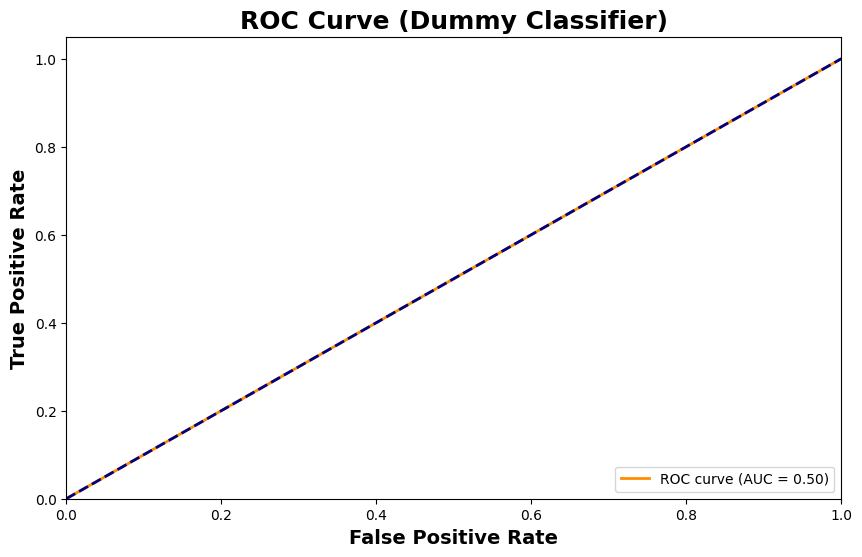

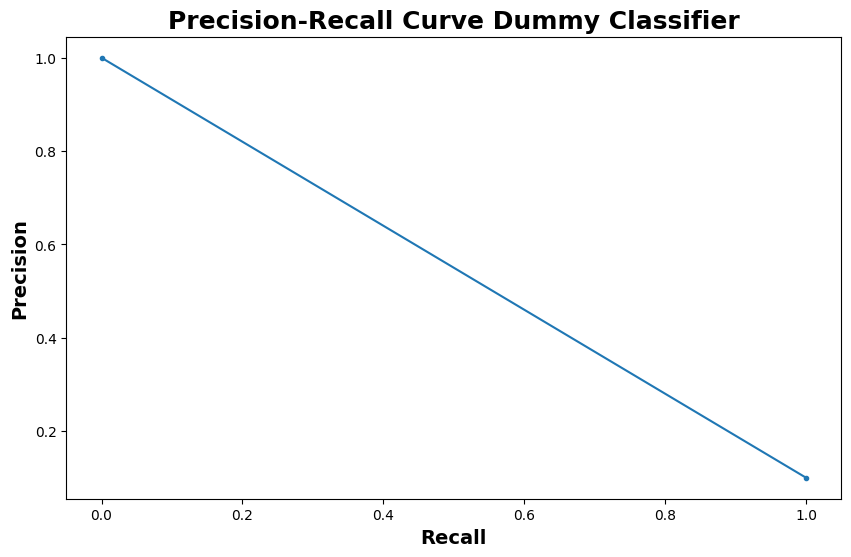

In [41]:
# Queremos obtener las probabilidades predichas en el conjunto de prueba
y_pred_proba_dummy = dummy.predict_proba(X_test2)[:, 1]

# Calculamos la curva ROC
fpr_dummy, tpr_dummy, thresholds_dummy = roc_curve(y_test2, y_pred_proba_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Representamos dicha curva en una gráfica
plt.figure(figsize=(10, 6))
plt.plot(fpr_dummy, tpr_dummy, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dummy:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('True Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.title('ROC Curve (Dummy Classifier)', {'fontweight':'bold', 'fontsize':18})
plt.legend(loc='lower right')
plt.savefig('ROC_curve_DummyClassifier.png', bbox_inches='tight')
plt.show()

# Calculamos la curva Precision-Recall
precision_curve_dummy, recall_curve_dummy, thresholds_dummy = precision_recall_curve(y_test2, y_pred_proba_dummy)

plt.figure(figsize=(10, 6))
plt.plot(recall_curve_dummy, precision_curve_dummy, marker='.')
plt.xlabel('Recall', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('Precision', {'fontweight':'bold', 'fontsize':14})
plt.title('Precision-Recall Curve Dummy Classifier', {'fontweight':'bold', 'fontsize':18})
plt.grid(False)
plt.savefig('Precision-recall_curve_DummyClassifier.png', bbox_inches='tight')
plt.show()

>Como podemos ver en este gráfico, cuando usamos un Dummy Classifier como nuestro modelo de clasificación tenemos que la probabilidad de predecir uno u otro valor es exactamente 0.5, es decir, decide de manera aleatoria a que categoría pertenece cada dato. Por tanto, no es un modelo confiable, tenemos que evitar los modelos que se comporten de esta manera. A partir de ahora, compararemos las métricas de los siguientes modelos con las del Dummy Classifier (mostradas arriba) para establecer como de convenientes son para este caso. <br>
En el caso de la curva Precision-Recall el gráfico debería mostrar una marca en el punto (0, 0), sin embargo en este caso no lo está haciendo. Lo que podemos deducir del gráfico, es en cuanto queremos obtener un recall un poco más alto, el precision score baja prácticamente a 0, por lo tanto este modelo no va a predecir las categorías de forma confiable nunca.

### 6.2. DECISION TREE CLASSIFIER

El uso de este modelo nos aporta una mayor interpretabilidad, un mejor manejo de las características irrelevantes, facilidad a la hora de ajustar los parámetros, además de ayudarnos a identificar alguna de las características más importantes. 

In [73]:
clf_class = DecisionTreeClassifier()
clf = clf_class.fit(X_train2, y_train2) 

Como hemos dicho previamente, los árboles de decisión nos permiten identificar las características más importantes de nuestro conjunto de datos. Vamos a visualizarlo a partir del siguiente gráfico.

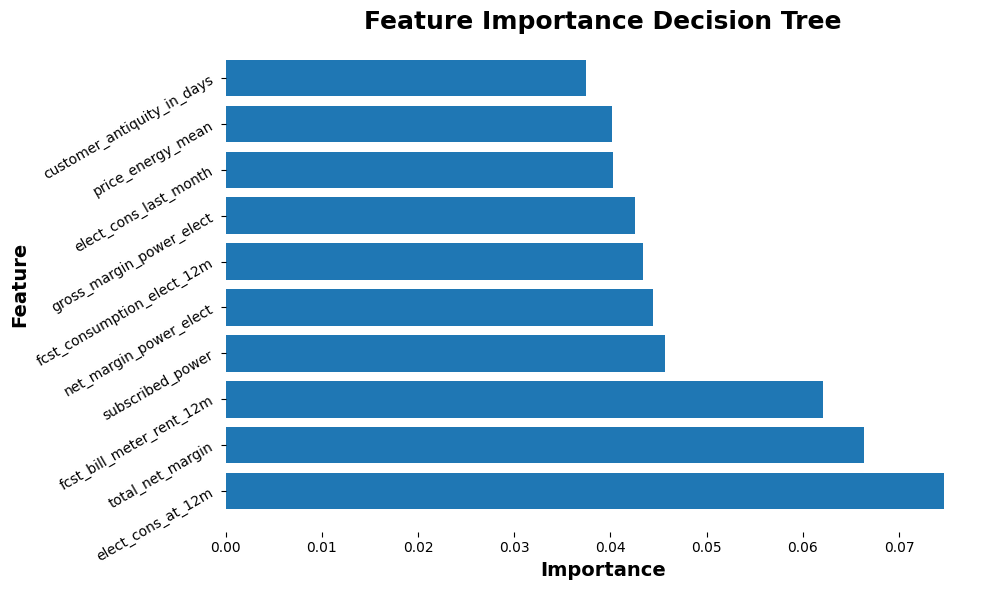

In [74]:
# Obtenemos la importancia de las características a partir de nuestro modelo
feature_importances = clf.feature_importances_
# Obtenemos los índices de las características más importantes ordenadas en orden descendente
sorted_indices = np.argsort(feature_importances)[::-1]
# Ordenamos ahora los nombres de dichas características de acuerdo con los índices obtenidos
# Sólo queremos mostrar en este caso las 10 características más importantes
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices][:10]
# Mostramos de manera visual los datos, a través de una gráfico de barras horizontal
plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.barh(range(10), sorted_importances[:10], tick_label = sorted_feature_names)
plt.xlabel('Importance', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('Feature', {'fontweight':'bold', 'fontsize':14})
plt.title('Feature Importance Decision Tree', {'fontweight':'bold', 'fontsize':18})
plt.yticks(rotation=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('feature_importance_DecisionTree.png', bbox_inches='tight')
plt.tight_layout()

>Vemos como con los parámetros actuales de nuestro modelo hay muchas características consideradas bastante importantes por el modelo a la hora de predecir sobre los datos. 

Una vez hemos visto esto, vamos a evaluar a través de distintas métricas cómo de bueno es dicho modelo. Dependiendo de los resultados que obtengamos, podemos además realizar algún cambio en los propios parámetros del clasificador para mejorar sus prestaciones. Para evaluar las distintas métricas, necesitamos comparar los valores predichos reales, *y_test*, y los valores predichos por nuestro modelo.

In [75]:
y_pred_tree = clf.predict(X_test2)

# Podemos ahora aplicar las distintas métricas sobre ambos valores.
print('Accuracy: {:.2f}'.format(accuracy_score(y_test2, y_pred_tree)))
print('Precision: {:.2f}'.format(precision_score(y_test2, y_pred_tree, zero_division=0.0)))
print('Recall: {:.2f}'.format(recall_score(y_test2, y_pred_tree)))
print('F1 score: {:.2f}'.format(f1_score(y_test2, y_pred_tree, zero_division=0.0)))
print('Brier score: {:.2f}'.format(brier_score_loss(y_test2, y_pred_tree))) 

Accuracy: 0.84
Precision: 0.20
Recall: 0.23
F1 score: 0.22
Brier score: 0.16


>Comparando los valores obtenidos para estas métricas con los obtenidos para las mismas en el caso del Dummy Classifier, aunque en el caso de algunos valores sí podemos ver ciertas mejoras, tenemos otros que son peores que los del Dummy Classifier (sobre todo *accuracy* y *Brier score*). Por lo tanto parece que el modelo con los parámetros actuales no es del todo bueno.

Veamos ahora la calidad predictiva del modelo ayudándonos de las métricas que explicamos anteriormente.

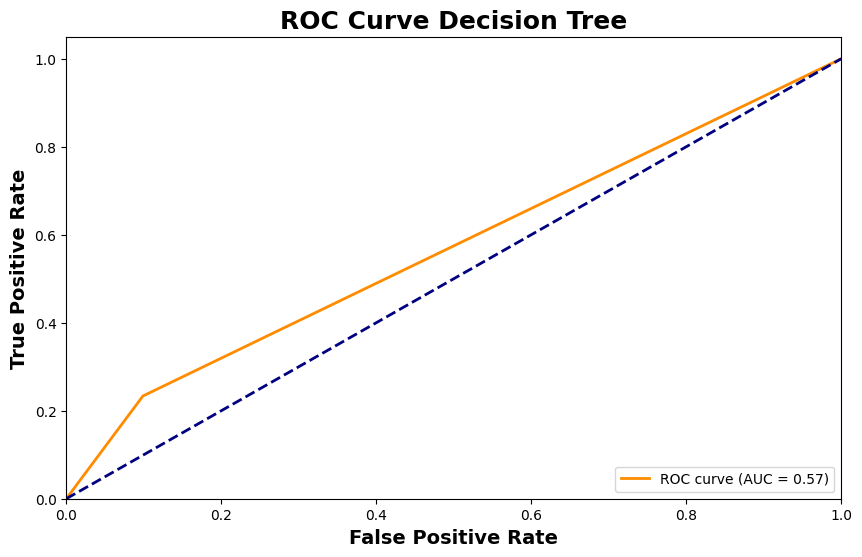

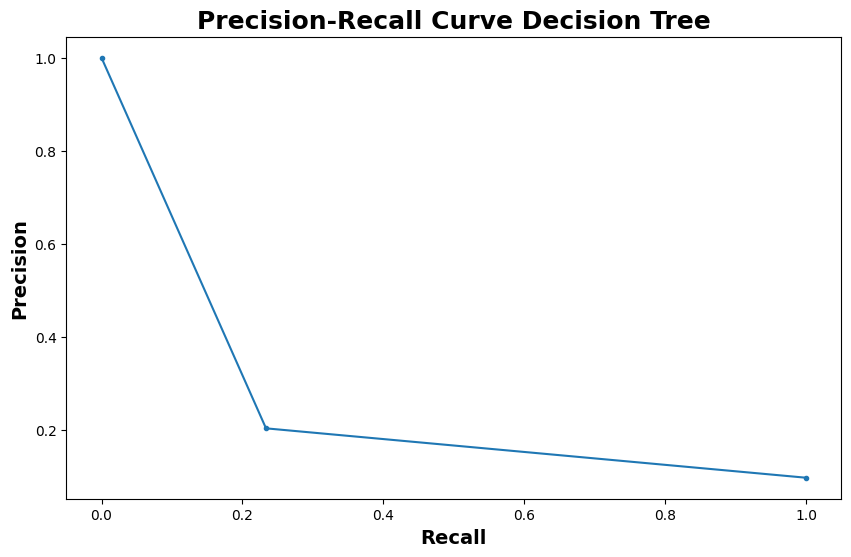

In [76]:
# Queremos obtener las probabilidades predichas en el conjunto de prueba
y_pred_proba_tree = clf.predict_proba(X_test2)[:, 1]

# Calculamos la curva ROC
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test2, y_pred_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Representamos dicha curva en una gráfica
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('True Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.title('ROC Curve Decision Tree', {'fontweight':'bold', 'fontsize':18})
plt.legend(loc='lower right')
plt.savefig('ROC_curve_DecisionTree.png', bbox_inches='tight')
plt.show()

# Calculamos la curva Precision-Recall
precision_curve_tree, recall_curve_tree, thresholds_tree1 = precision_recall_curve(y_test2, y_pred_proba_tree)

plt.figure(figsize=(10, 6))
plt.plot(recall_curve_tree, precision_curve_tree, marker='.')
plt.xlabel('Recall', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('Precision', {'fontweight':'bold', 'fontsize':14})
plt.title('Precision-Recall Curve Decision Tree', {'fontweight':'bold', 'fontsize':18})
plt.grid(False)
plt.savefig('Precision-recall_curve_DecisionTree.png', bbox_inches='tight')
plt.show()

>En este caso, tenemos que nuestro Decision Tree tiene un AUC (Area Under Curve) mejora ligeramente respecto del AUC del Dummy Classifier. Sin embargo, sigue sin ser lo suficientemente confiable, pues sigue siendo demasiado cercano a 0.5. Esto indica que todavía existe bastante aleatoriedad a la hora de predecir que es de lo que tratamos de huir. Por otro lado, la curva Precision-Recall vemos como está lejos de aproximarse a valores deseados, por tanto vamos a ver como retocar los parámetros para mejorar este modelo.

Para llevar a cabo esta mejora nos vamos a ayudar de *GridSearchCV*. Este método sirve para encontrar los valores de los hiperparámetros de un modelo que ofrecen mejores resultados y realiza automáticamente validaciones cruzadas. En definitiva, sirve para optimizar el rendimiento de un modelo de Machine Learning. <br> Debemos darnos cuenta que el parámetro *scoring* sirve para especificar en función de que métrica queremos mejorar el rendimiento del modelo. En este caso, hemos seleccionado *accuracy*. <br> Por lo visto con la curva *Precision-Recall*, en cuanto aumentemos mínimamente el valor de *recall* entonces *precision* sufrirá una caída abrupta. Por tanto, hemos decidido en este caso que la búsqueda de *GridSeacrhCV* se centre en *F1 score*.

In [77]:
# Define a dictionary of hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf_class, param_grid=param_grid, 
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train2, y_train2)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model)
best_dt_classifier = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_dt_classifier.score(X_test2, y_test2)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.8493661446681581


Teniendo en cuenta los resultados que acabamos de obtener gracias a *GridSearchCV* ya sabemos los valores óptimos de los parámetros que hemos evaluado en este caso. Aún así, podemos hacer pequeñas pruebas con el resto de parámetros que tienen los modelos Decision Tree y ver como afectan dichos cambios en la predicción del modelo. 

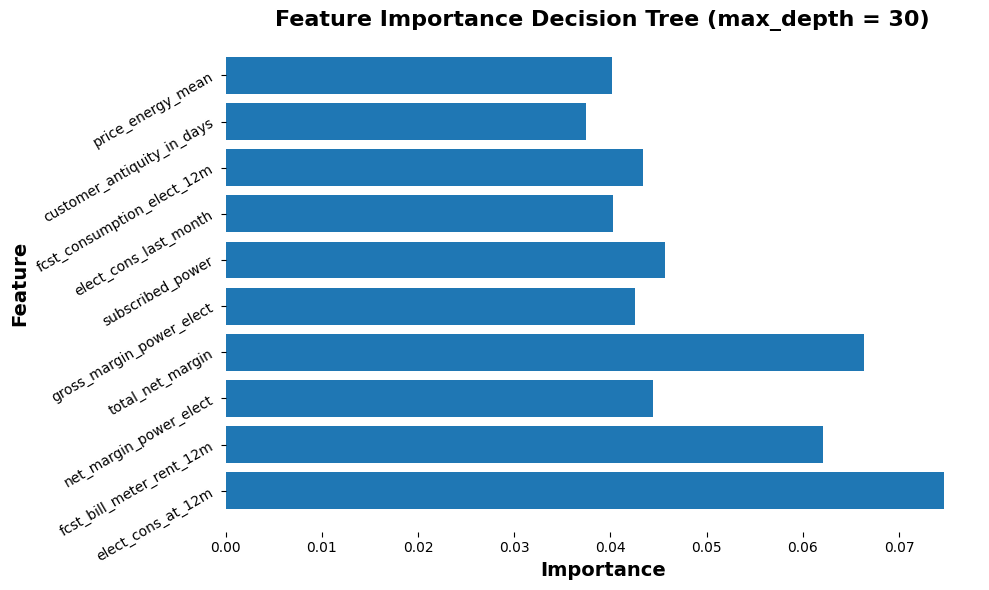

In [81]:
clf_class2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 30, min_samples_leaf = 1, min_samples_split = 10)
clf2 = clf_class2.fit(X_train2, y_train2)

feature_importances2 = clf2.feature_importances_

sorted_indices2 = np.argsort(feature_importances2)[::-1]

sorted_importances2 = feature_importances[sorted_indices2]
sorted_feature_names2 = X_train.columns[sorted_indices2][:10]

plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.barh(range(10), sorted_importances2[:10], tick_label = sorted_feature_names2)
plt.xlabel('Importance', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('Feature', {'fontweight':'bold', 'fontsize':14})
plt.title('Feature Importance Decision Tree (max_depth = 30)', {'fontweight':'bold', 'fontsize':16})
plt.yticks(rotation=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('feature_importance_DecisionTree2.png', bbox_inches='tight')
plt.tight_layout()

>Teniendo en cuenta este gráfico, podemos ver las características que tiene en cuenta el modelo a la hora de predecir la clase de cada uno de los datos. Debemos darnos cuenta de que aparentemente la importancia de todas no es demasiado grande, pues los valores son todos menores de 0.1. Teniendo esto en cuenta, toma sobre todo en consideración las columnas *elect_consum_at_12m*, *total_net_margin* y *fcst_bill_meter_rent_12m*. <br> Podríamos entonces afirmar que el modelo tiene principalmente en cuenta el consumo de energía predicho para el cliente para los próximos 12 meses. También toma en consideración el margen total de potencia que puede contratar el cliente y el alquiler previsto para el contador en los próximos 12 meses, a la hora de predecir si van a seguir siendo o no nuestros clientes.

In [83]:
y_pred_tree2 = clf2.predict(X_test2)

# Podemos ahora aplicar las distintas métricas sobre ambos valores.
print('Accuracy: {:.2f}'.format(accuracy_score(y_test2, y_pred_tree2)))
print('Precision: {:.2f}'.format(precision_score(y_test2, y_pred_tree2, zero_division=0.0)))
print('Recall: {:.2f}'.format(recall_score(y_test2, y_pred_tree2)))
print('F1 score: {:.2f}'.format(f1_score(y_test2, y_pred_tree2, zero_division=0.0)))
print('Brier score: {:.2f}'.format(brier_score_loss(y_test2, y_pred_tree2)))

Accuracy: 0.85
Precision: 0.22
Recall: 0.22
F1 score: 0.22
Brier score: 0.15


>Comparando los valores de las métricas con los que hemos obtenido para Dummy Classifier, podemos ver como los valores *accuracy* y *brier_score* son de hecho peores. Mientras tanto, el resto de métricas se han incrementado ligeramente, sobre todo *precision* y *F1 score*, que es la que buscábamos aumentar con *GridSearchCV*. Teniendo todo esto en cuenta, ante un modelo mejor tanto que el Dummy Classifier como el Decision Tree anterior, pero no podríamos afirmar que este modelo es el indicado ya que ciertos valores son demasiado cercanos o peores que los valores no deseables.

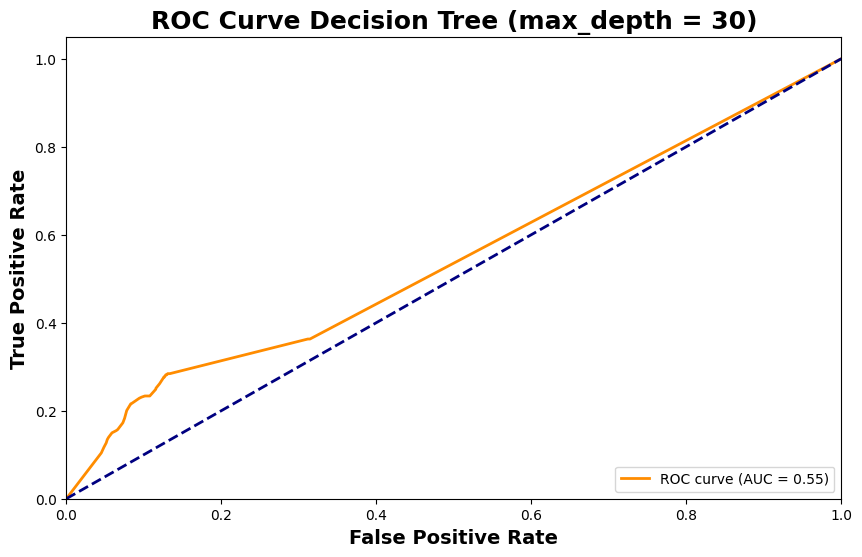

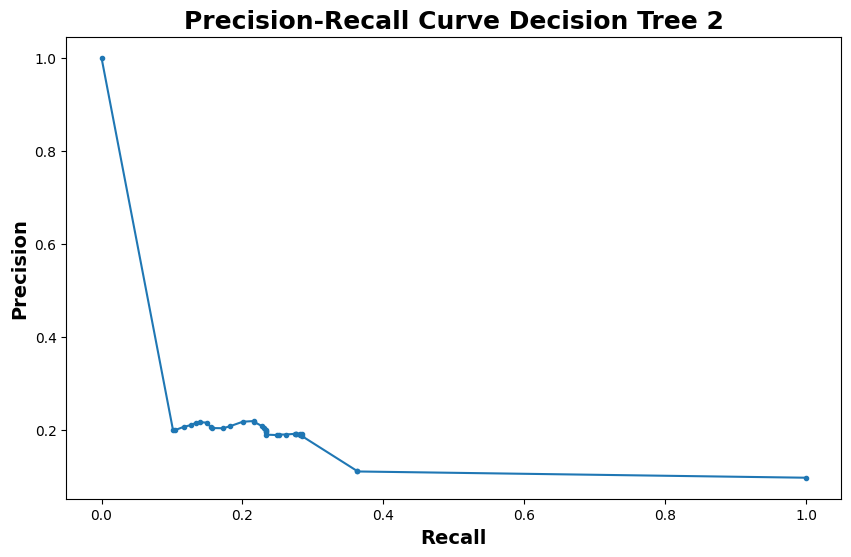

In [84]:
y_pred_proba_tree2 = clf2.predict_proba(X_test2)[:, 1]

# Calculamos la curva ROC
fpr_tree2, tpr_tree2, thresholds_tree2 = roc_curve(y_test2, y_pred_proba_tree2)
roc_auc_tree2 = auc(fpr_tree2, tpr_tree2)

# Representamos dicha curva en una gráfica
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree2, tpr_tree2, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_tree2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('True Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.title('ROC Curve Decision Tree (max_depth = 30)', {'fontweight':'bold', 'fontsize':18})
plt.legend(loc='lower right')
plt.savefig('ROC_curve_DecisionTree2.png', bbox_inches='tight')
plt.show()

# Calculamos la curva Precision-Recall
precision_curve_tree2, recall_curve_tree2, thresholds_tree22 = precision_recall_curve(y_test2, y_pred_proba_tree2)

plt.figure(figsize=(10, 6))
plt.plot(recall_curve_tree2, precision_curve_tree2, marker='.')
plt.xlabel('Recall', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('Precision', {'fontweight':'bold', 'fontsize':14})
plt.title('Precision-Recall Curve Decision Tree 2', {'fontweight':'bold', 'fontsize':18})
plt.grid(False)
plt.savefig('Precision-recall_curve_DecisionTree2.png', bbox_inches='tight')
plt.show()

>Por último, teniendo en cuenta también los gráficos ROC de los anteriores modelos, vemos una pequeña mejora respecto al Dummy Classifier pero no respecto al primer Decision Tree. Sin embargo, tenemos un AUC todavía muy próximo a 0.5, lo cual significa una gran aleatoriedad a la hora de realizar las predicciones. En el caso de la curva Precision-Recall podemos ver como hay una rápida bajada en el valor de *precision* en cuanto aumenta el *recall*. Por tanto, si quisiéramos que nuestro modelo fuera orientado hacia el parámetro*precision*, deberíamos quedarnos con una precision alta aunque eso implique un valor de recall bajo (cercano a 0.05). 

### 6.3. RANDOM FOREST

Utilizamos este modelo principalmente por su capacidad de evitar el overfitting, la alta precisión que suelen proporcionar a la hora de resolver problemas de clasificación o la buena adaptación a datos no balanceados, como los de nuestro caso.

In [23]:
rf_class = RandomForestClassifier()
rf = rf_class.fit(X_train2, y_train2) 

Al igual que en el caso de los *Decision Tree* podemos obtener la importancia de las características a la hora de predecir la clase de nuestros datos por este *Random Forest*. Veámoslo a continuación en el siguiente gráfico.

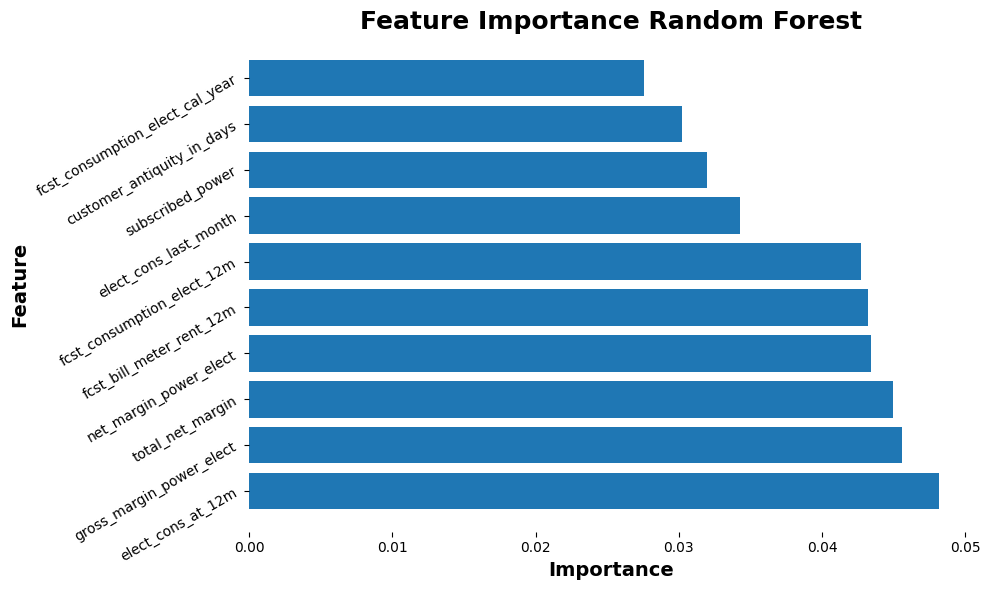

In [24]:
# Obtenemos la importancia de las características a partir de nuestro modelo
feature_importances_rf = rf.feature_importances_
# Obtenemos los índices de las características más importantes ordenadas en orden descendente
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]
# Ordenamos ahora los nombres de dichas características de acuerdo con los índices obtenidos
# Sólo queremos mostrar en este caso las 10 características más importantes
sorted_importances_rf = feature_importances_rf[sorted_indices_rf]
sorted_feature_names_rf = X_train.columns[sorted_indices_rf][:10]
# Mostramos de manera visual los datos, a través de una gráfico de barras horizontal
plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.barh(range(10), sorted_importances_rf[:10], tick_label = sorted_feature_names_rf)
plt.xlabel('Importance', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('Feature', {'fontweight':'bold', 'fontsize':14})
plt.title('Feature Importance Random Forest', {'fontweight':'bold', 'fontsize':18})
plt.yticks(rotation=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('feature_importance_RandomForest.png', bbox_inches='tight')
plt.tight_layout()

>Podemos ver como el modelo tiene en cuenta estas características de manera bastante equitativa ya que no hay ninguna que sobresalga por encima del resto. Así que es probable que tengamos que cambiar ciertos parámetros para conseguir que la clasificaciión sea más efectiva.

In [25]:
y_pred_rf = rf.predict(X_test2)

# Podemos ahora aplicar las distintas métricas sobre ambos valores.
print('Accuracy: {:.2f}'.format(accuracy_score(y_test2, y_pred_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test2, y_pred_rf)))
print('Recall: {:.2f}'.format(recall_score(y_test2, y_pred_rf)))
print('F1 score: {:.2f}'.format(f1_score(y_test2, y_pred_rf)))
print('Brier score: {:.2f}'.format(brier_score_loss(y_test2, y_pred_rf)))

Accuracy: 0.91
Precision: 0.64
Recall: 0.08
F1 score: 0.14
Brier score: 0.09


>Podemos comparar estos valores tanto como con el Dummy Classifier como con las distintas pruebas que hemos hecho de los Decision Tree. Podemos ver que en general mejoran a ambos en todos los parámetros, sobre todo en *precision* y *F1 score*. En especial *precision* tiene un valor muy alto, lo cual nos indica que el modelo ofrece una menor cantidad de falsos positivos. Parece por tanto, que este modelo clasfica mejor nuestros datos en un principio.

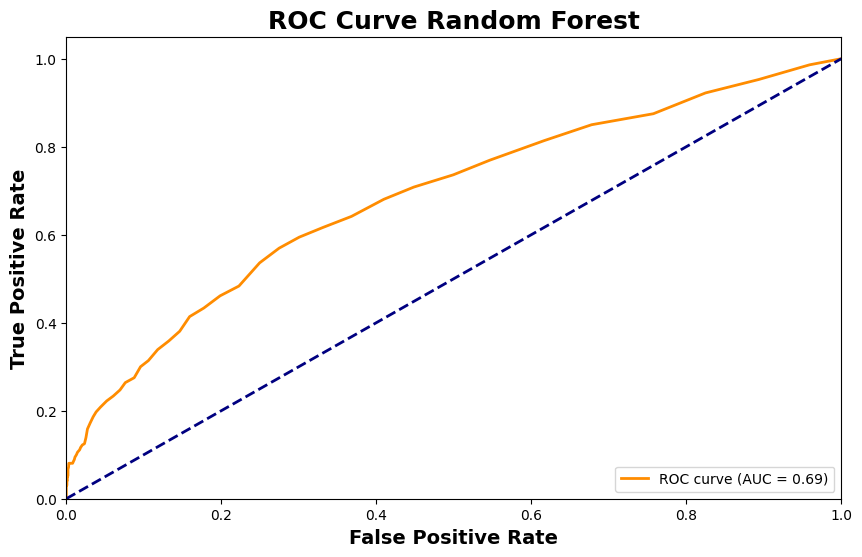

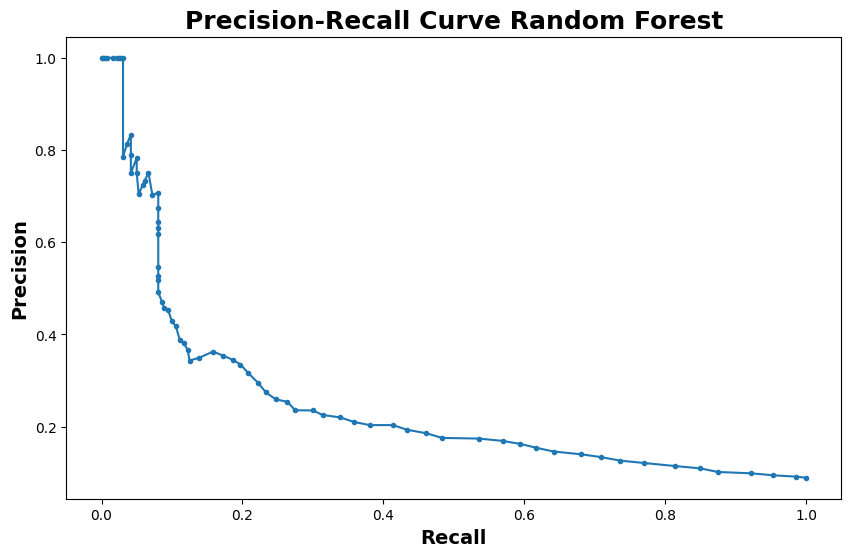

In [26]:
y_pred_proba_rf = rf.predict_proba(X_test2)[:, 1]

# Calculamos la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test2, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Representamos dicha curva en una gráfica
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('True Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.title('ROC Curve Random Forest', {'fontweight':'bold', 'fontsize':18})
plt.legend(loc='lower right')
plt.savefig('ROC_curve_RandomForest.png', bbox_inches='tight')
plt.show()

# Calculamos la curva Precision-Recall
precision_curve_rf, recall_curve_rf, thresholds_rf1 = precision_recall_curve(y_test2, y_pred_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(recall_curve_rf, precision_curve_rf, marker='.')
plt.xlabel('Recall', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('Precision', {'fontweight':'bold', 'fontsize':14})
plt.title('Precision-Recall Curve Random Forest', {'fontweight':'bold', 'fontsize':18})
plt.grid(False)
plt.savefig('Precision-recall_curve_RandomForest.png', bbox_inches='tight')
plt.show()

>Por último, por un lado hemos utilizado para evaluar nuestro modelo la curva ROC y el AUC. Podemos observar una mejora significativa respecto de los modelos anteriores, pues tenemos un AUC bastante aceptable, al haberse alejado bastante del valor crítico 0.5. Por tanto, este modelo reduce la aleatoriedad a la hora de clasificar nuestros datos. Y por otro lado, la curva Precision-Recall no muestra una bajada tan abrupta como en los casos anteriores, ya que *precision* sigue teniendo un valor de 1 mientras *recall* va avanzando. En este caso, podríamos aproximarnos a valores de *recall* más cercanos a 0.1 manteniendo un valor de *precision* aceptable.

Al igual que en el caso anterior, vamos a tratar de encontrar los valores más óptimos posibles a la hora de entrenar nuestro modelo. Usaremos para ello *GridSearchCV* como vimos anteriormente.

In [32]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] #auto no es un parámetro válido, ha sido sustituido por sqrt
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_class, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train2, y_train2)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model)
best_rf_classifier = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_rf_classifier.score(X_test2, y_test2)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

Al igual que hemos hecho en el caso de los Decision Tree, podemos modificar ciertos parámetros a la hora de definir el modelo para conseguir unas mejores prestaciones del mismo. Por tanto, teniendo en cuenta el estudio llevado a cabo por *GridSearchCV* de los valores óptimos de los parámetros especificados estudiaremos ahora el comportamiento del siguiente Random Forest modificado.

In [27]:
rf_class2 = RandomForestClassifier(n_estimators = 100, max_depth = 30,  max_features = 'sqrt')
rf2 = rf_class2.fit(X_train2, y_train2)

>Por lo que he visto modificando ligeramente los parámetros, si para *max_features* tenemos *log2* entonces obtenemos un mejor valor para *precision* pero baja un poco el *F1 score*, mientras que con *sqrt* mejora el valor de *F1 score* y baja el valor de *precision*. Hemos decidido en este caso priorizar el *F1 score* y por eso escogemos *sqrt* para dicho parámetro. <br> Sucede parecido con el valor de *max_depth* pues con valores bajos aumenta mucho *precision* pero esto lleva a valores muy pequeños en el resto de métricas. <br> En el caso de *n_estimators*, un aumento en su valor reduce el valor de *precision* pero mantiene similares el resto, por tanto escogemos el valor que nos ofrece una mejor *precision*.

In [28]:
y_pred_rf2 = rf2.predict(X_test2)

# Podemos ahora aplicar las distintas métricas sobre ambos valores.
print('Accuracy: {:.2f}'.format(accuracy_score(y_test2, y_pred_rf2)))
print('Precision: {:.2f}'.format(precision_score(y_test2, y_pred_rf2, zero_division = 0.0)))
print('Recall: {:.2f}'.format(recall_score(y_test2, y_pred_rf2)))
print('F1 score: {:.2f}'.format(f1_score(y_test2, y_pred_rf2, zero_division = 0.0)))
print('Brier score: {:.2f}'.format(brier_score_loss(y_test2, y_pred_rf2)))

Accuracy: 0.91
Precision: 0.65
Recall: 0.08
F1 score: 0.14
Brier score: 0.09


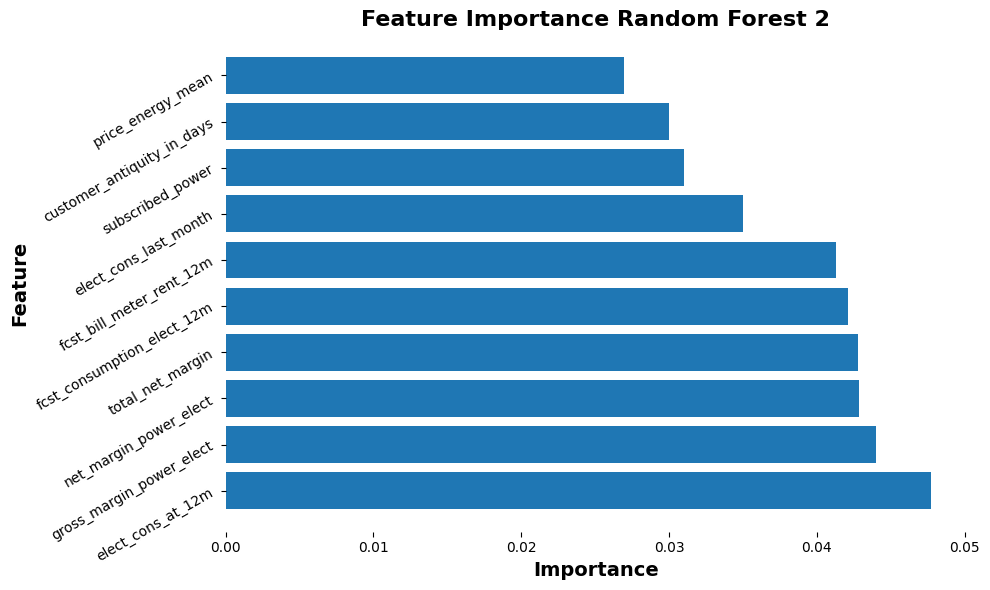

In [29]:
feature_importances_rf2 = rf2.feature_importances_

sorted_indices_rf2 = np.argsort(feature_importances_rf2)[::-1]

sorted_importances_rf2 = feature_importances_rf2[sorted_indices_rf2]
sorted_feature_names_rf2 = X_train.columns[sorted_indices_rf2][:10]

plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.barh(range(10), sorted_importances_rf2[:10], tick_label = sorted_feature_names_rf2)
plt.xlabel('Importance', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('Feature', {'fontweight':'bold', 'fontsize':14})
plt.title('Feature Importance Random Forest 2', {'fontweight':'bold', 'fontsize':16})
plt.yticks(rotation=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('feature_importance_RandomForest2.png', bbox_inches='tight')
plt.tight_layout()

>Al igual que en el otro modelo de Random Forest vemos como entre las características más importantes, todas tienen un peso similar a la hora de que el modelo decida clasificar a los clientes en una clase u otra. 

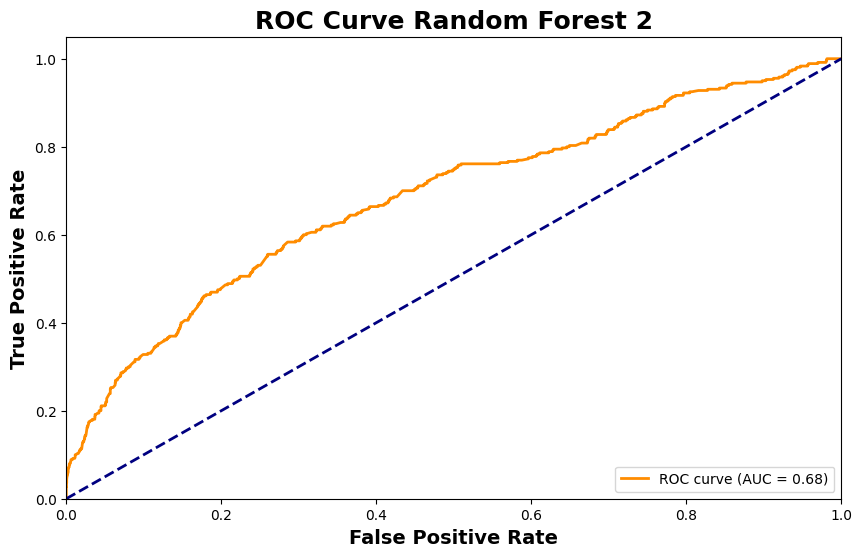

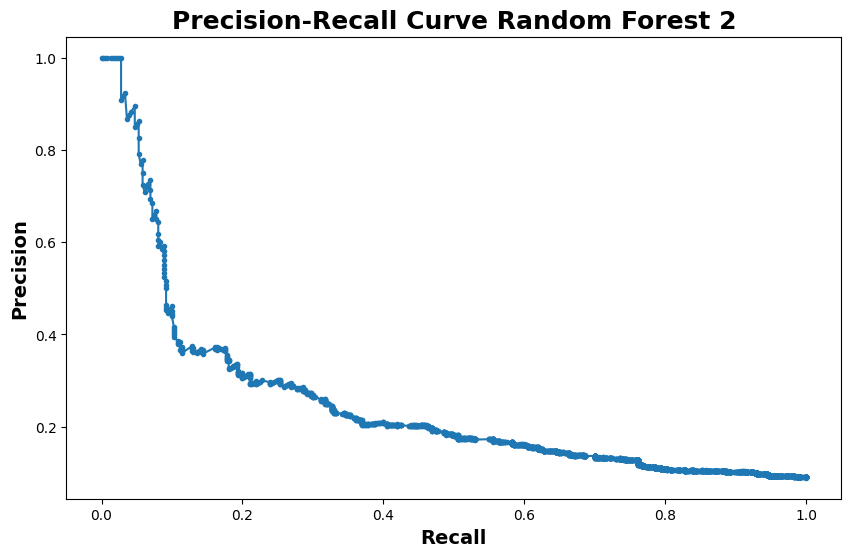

In [30]:
y_pred_proba_rf2 = rf2.predict_proba(X_test2)[:, 1]

# Calculamos la curva ROC
fpr_rf2, tpr_rf2, thresholds_rf2 = roc_curve(y_test2, y_pred_proba_rf2)
roc_auc_rf2 = auc(fpr_rf2, tpr_rf2)

# Representamos dicha curva en una gráfica
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf2, tpr_rf2, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('True Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.title('ROC Curve Random Forest 2', {'fontweight':'bold', 'fontsize':18})
plt.legend(loc='lower right')
plt.savefig('ROC_curve_RandomForest2.png', bbox_inches='tight')
plt.show()

# Calculamos precision and recall scores
precision = precision_score(y_test2, y_pred_rf2)
recall = recall_score(y_test2, y_pred_rf2)
# Calculamos la curva Precision-Recall
precision_curve_rf2, recall_curve_rf2, thresholds_rf22 = precision_recall_curve(y_test2, y_pred_proba_rf2)

plt.figure(figsize=(10, 6))
plt.plot(recall_curve_rf2, precision_curve_rf2, marker='.')
plt.xlabel('Recall', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('Precision', {'fontweight':'bold', 'fontsize':14})
plt.title('Precision-Recall Curve Random Forest 2', {'fontweight':'bold', 'fontsize':18})
plt.grid(False)
plt.savefig('Precision-recall_curve_RandomForest2.png', bbox_inches='tight')
plt.show()


>Siguiendo los pasos de los casos anteriores, utilizamos la curva ROC y la curva *Precision-Recall* para evaluar nuestro modelo. En el caso del primer gráfico podemos observar que el AUC es igual al del Random Forest anterior aunque la curva presenta más irregularidades, pero parece indicar que ambos modelos van a ofrecer unos resultados similares. Por otro lado, el segundo de los gráficos es muy similar a la curva *Precision-Recall* del Random Forest anterior, la única diferencia significativa es que viene determinada por un mayor número de puntos.

### 6.4. GRADIENT BOOSTING CLASSIFIER

Este modelo suele proporcionar también una alta precisión a la hora de predecir los datos, así como una reducción del overfitting (se reducen tanto el sesgo como la varianza), un buen trabajo con datos desbalanceados como los que tenemos en este caso, una potente optimización o la capacidad de elegir distintas funciones de pérdida entre otras características.

In [183]:
gbc_class = GradientBoostingClassifier()
gbc = gbc_class.fit(X_train2, y_train2) 

Al igual que en el resto de modelos, vamos a ir obteniendo distintas métricas con las que comparar su rendimiento.

In [184]:
y_pred_gbc = gbc.predict(X_test2)

# Podemos ahora aplicar las distintas métricas sobre ambos valores.
print('Accuracy: {:.2f}'.format(accuracy_score(y_test2, y_pred_gbc)))
print('Precision: {:.2f}'.format(precision_score(y_test2, y_pred_gbc)))
print('Recall: {:.2f}'.format(recall_score(y_test2, y_pred_gbc)))
print('F1 score: {:.2f}'.format(f1_score(y_test2, y_pred_gbc)))
print('Brier score: {:.2f}'.format(brier_score_loss(y_test2, y_pred_gbc))) 

Accuracy: 0.90
Precision: 0.57
Recall: 0.02
F1 score: 0.04
Brier score: 0.10


>Observando los valores de estas métricas, vemos como obtenemos un buen resultado para la métrica *precision*, pero el resto de valores no son demasiado llamativos. Debemos mirar por tanto otras métricas para averiguar si nos interesa emplear definitivamente este modelo para nuestro caso.

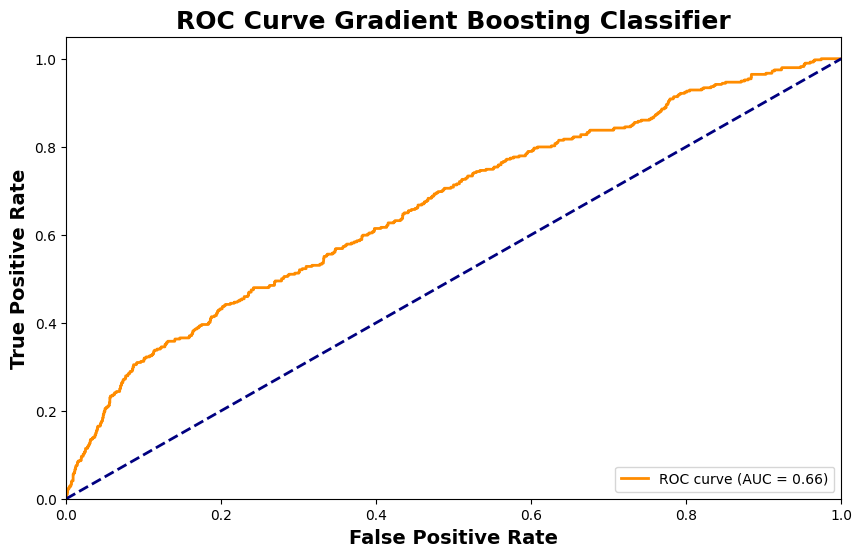

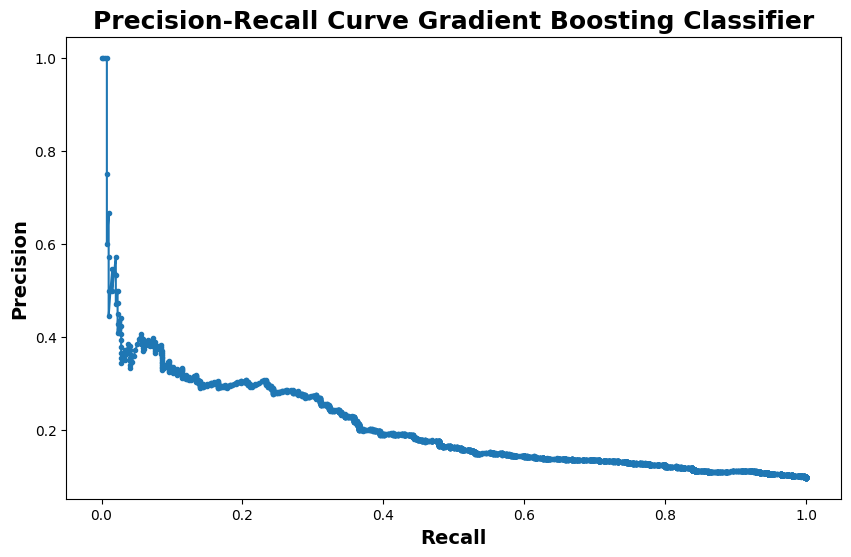

In [185]:
y_pred_proba_gbc = gbc.predict_proba(X_test2)[:, 1]

# Calculamos la curva ROC
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test2, y_pred_proba_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

# Representamos dicha curva en una gráfica
plt.figure(figsize=(10, 6))
plt.plot(fpr_gbc, tpr_gbc, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gbc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('True Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.title('ROC Curve Gradient Boosting Classifier', {'fontweight':'bold', 'fontsize':18})
plt.legend(loc='lower right')
plt.savefig('ROC_curve_GBC.png', bbox_inches='tight')
plt.show()

# Calculamos precision and recall scores
precision = precision_score(y_test2, y_pred_gbc)
recall = recall_score(y_test2, y_pred_gbc)
# Calculamos la curva Precision-Recall
precision_curve_gbc, recall_curve_gbc, thresholds_gbc1 = precision_recall_curve(y_test2, y_pred_proba_gbc)

plt.figure(figsize=(10, 6))
plt.plot(recall_curve_gbc, precision_curve_gbc, marker='.')
plt.xlabel('Recall', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('Precision', {'fontweight':'bold', 'fontsize':14})
plt.title('Precision-Recall Curve Gradient Boosting Classifier', {'fontweight':'bold', 'fontsize':18})
plt.grid(False)
plt.savefig('Precision-recall_curve_GBC.png', bbox_inches='tight')
plt.show()

>Observando estas dos gráficas, vemos como el AUC de este modelo no es mejor que por ejemplo el de los Random Forest, por tanto si quisiéramos utilizar este modelo para nuestro caso, deberíamos aumentar dicho score. En segundo lugar, viendo la curva *Precision-Recall*, vemos como para tener valores altos de *precision* es necesario que los valores de *recall* son muy bajos, pues en cuanto aumenta ligeramente este segundo valor el primero decrece drásticamente.

En los casos anteriores para estudiar los valores óptimos para los parámetros del modelo hemos utilizado el método *GridSearchCV*. En este caso, tras una breve comparación de los parámetros del *Gradient Boosting Classifier* hemos visto que tiene parámetros parecidos a los *Random Forest* por tanto vamos a ir ajustando los parámetros manualmente. La mayor novedad es el parámetro *learning_rate* que controla la contribución de cada árbol individual al modelo en el proceso de entrenamiento. Vamos a hacer distintas pruebas con dicho parámetro hasta obtener el que mejores métricas nos ofrezca.

In [236]:
gbc_class2 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.15, max_depth = 15)
gbc2 = gbc_class2.fit(X_train2, y_train2) 

>Finalmente hemos decidido quedarnos con este clasificador y estos parámetros pues son con los que mejores valores hemos obtenido para las métricas que veremos a continuación.

In [237]:
y_pred_gbc2 = gbc2.predict(X_test2)

# Podemos ahora aplicar las distintas métricas sobre ambos valores.
print('Accuracy: {:.2f}'.format(accuracy_score(y_test2, y_pred_gbc2)))
print('Precision: {:.2f}'.format(precision_score(y_test2, y_pred_gbc2, zero_division = 0.0)))
print('Recall: {:.2f}'.format(recall_score(y_test2, y_pred_gbc2)))
print('F1 score: {:.2f}'.format(f1_score(y_test2, y_pred_gbc2)))
print('Brier score: {:.2f}'.format(brier_score_loss(y_test2, y_pred_gbc2))) 

Accuracy: 0.91
Precision: 0.63
Recall: 0.09
F1 score: 0.16
Brier score: 0.09


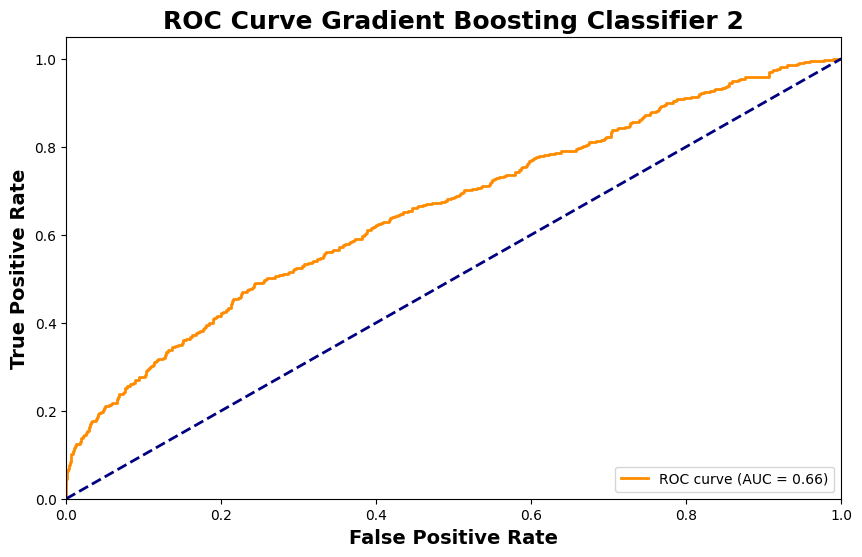

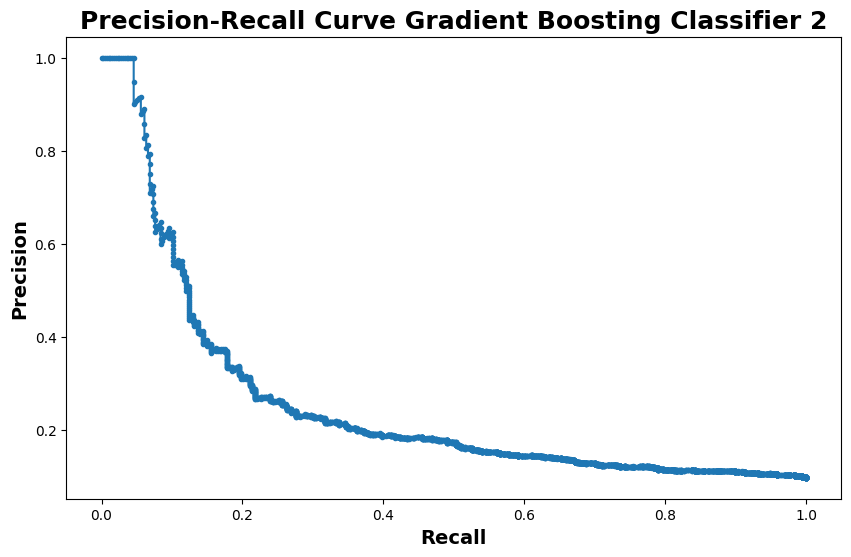

In [238]:
y_pred_proba_gbc2 = gbc2.predict_proba(X_test2)[:, 1]

# Calculamos la curva ROC
fpr_gbc2, tpr_gbc2, thresholds_gbc2 = roc_curve(y_test2, y_pred_proba_gbc2)
roc_auc_gbc2 = auc(fpr_gbc2, tpr_gbc2)

# Representamos dicha curva en una gráfica
plt.figure(figsize=(10, 6))
plt.plot(fpr_gbc2, tpr_gbc2, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gbc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('True Positive Rate', {'fontweight':'bold', 'fontsize':14})
plt.title('ROC Curve Gradient Boosting Classifier 2', {'fontweight':'bold', 'fontsize':18})
plt.legend(loc='lower right')
plt.savefig('ROC_curve_GBC2.png', bbox_inches='tight')
plt.show()

# Calculamos precision and recall scores
precision = precision_score(y_test2, y_pred_gbc2)
recall = recall_score(y_test2, y_pred_gbc2)
# Calculamos la curva Precision-Recall
precision_curve_gbc2, recall_curve_gbc2, thresholds_gbc22 = precision_recall_curve(y_test2, y_pred_proba_gbc2)

plt.figure(figsize=(10, 6))
plt.plot(recall_curve_gbc2, precision_curve_gbc2, marker='.')
plt.xlabel('Recall', {'fontweight':'bold', 'fontsize':14})
plt.ylabel('Precision', {'fontweight':'bold', 'fontsize':14})
plt.title('Precision-Recall Curve Gradient Boosting Classifier 2', {'fontweight':'bold', 'fontsize':18})
plt.grid(False)
plt.savefig('Precision-recall_curve_GBC2.png', bbox_inches='tight')
plt.show()

>Por último, observamos estas dos gráficas para terminar de evaluar el desempeño de nuestro modelo. Podemos ver con la curva ROC un comportamiento muy parecido al *Gradient Boosting Classifier* anterior, así como un valor AUC muy similar. Lo mismo ocurre si nos fijamos en la curva *Precision-Recall*, por tanto no hemos obtenido una mejora demasiado significativa al modificar los parámetros del *Gradient Boosting Classifier*.

### 6.5. ELECCIÓN DEL MODELO

Así, con ayuda de las métricas y los gráficos vistos que hemos ido obteniendo estudiando cada modelo, hemos decidido utilizar para este caso el *Random Forest* con parámetros *n_estimators = 100*, *max_depth = 30* y *max_features = 'sqrt'*. A partir de ahora, vamos a considerar dicho modelo como el modelo de Machine Learning sobre el cual vamos a basar las predicciones para los datos de nuestro caso de estudio.

### 6.6. PRUEBA DEL MODELO SOBRE EL CASO REAL

Recordemos que antes de empezar a probar con los distintos modelos dividimos hicimos *train_test_split* sobre la base de datos *X_train* e *y_train*. Una vez que hemos decidido el modelo que vamos a usar, lo aplicaremos sobre las bases de datos *X_train2*, *y_train2* y *X_test2* para poder así comprobar como de buenas son las predicciones que ofrece dicho modelo. Además, vamos a implementar el modelo veinte veces y luego calcular la media de las probabilidades obtenidas para mejorar lo máximo posible los resultados del modelo.

In [134]:
# Iniciamos la variable en la que vamos a guardar la media de predict_proba de todos los modelos
mean_predict_proba = np.empty(len(X_test2)) # El 2 marca el nº de clases que predice el modelo
n = 20
for _ in range(n):
    # Create and fit a Random Forest model
    rf_final = RandomForestClassifier(n_estimators = 100, max_depth = 30,  max_features = 'sqrt')  
    rff = rf_final.fit(X_train2, y_train2)
    
    y_pred_proba_rff = rff.predict_proba(X_test2)[:,1]
    # print(y_pred_proba_rff)

    # Aquí acumulamos las probabilidades predichas para cada uno de los modelos
    mean_predict_proba += y_pred_proba_rff

# Calculamos ahora la media de predict_proba de todos los modelos
mean_predict_proba = mean_predict_proba/n

Una vez que hemos calculado la media de la probabilidad de pertenecer a la clase 1 de todos los modelos, vamos a aplicar distintos *thresholds* y ver cómo el modelo lleva a cabo la clasificación al ir variando los valores.

In [142]:
thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
for nuevo_threshold in thresholds:
    y_pred_custom_threshold = np.where(mean_predict_proba > nuevo_threshold, 1, 0)
    print(f"Threshold: {nuevo_threshold}")
    print(pd.Series(y_pred_custom_threshold).value_counts())
    print(f'Con este threshold, el modelo predice que van a abandonar el {round((pd.Series(y_pred_custom_threshold).value_counts()[1]/pd.Series(y_pred_custom_threshold).value_counts()[0])*100,2)}% de los clientes.\n')

Threshold: 0.5
0    3996
1      27
Name: count, dtype: int64
Con este threshold, el modelo predice que van a abandonar el 0.68% de los clientes.

Threshold: 0.55
0    4000
1      23
Name: count, dtype: int64
Con este threshold, el modelo predice que van a abandonar el 0.57% de los clientes.

Threshold: 0.6
0    4005
1      18
Name: count, dtype: int64
Con este threshold, el modelo predice que van a abandonar el 0.45% de los clientes.

Threshold: 0.65
0    4008
1      15
Name: count, dtype: int64
Con este threshold, el modelo predice que van a abandonar el 0.37% de los clientes.

Threshold: 0.7
0    4009
1      14
Name: count, dtype: int64
Con este threshold, el modelo predice que van a abandonar el 0.35% de los clientes.

Threshold: 0.75
0    4011
1      12
Name: count, dtype: int64
Con este threshold, el modelo predice que van a abandonar el 0.3% de los clientes.

Threshold: 0.8
0    4013
1      10
Name: count, dtype: int64
Con este threshold, el modelo predice que van a abandonar el 

Teniendo en cuenta estos resultados, vamos a evaluar las distintas medidas usando distintos *thresholds* para poder observar así cómo afecta la selección de uno u otro a la hora de obtener nuestras conclusiones. Probaremos con los *thresholds* (0.55, 0.65, 0.65), lo que significa que el modelo determinará que un cliente pertenece a la clase 1 (cliente propenso a abandonar) cuando la probabilidad de pertenecer a dicha clase sea mayor o igual que 0.55 en el primer caso y análogamente en el resto.

In [158]:
y_pred_custom_threshold_1 = np.where(mean_predict_proba > 0.55, 1, 0)
y_pred_custom_threshold_2 = np.where(mean_predict_proba > 0.65, 1, 0)
y_pred_custom_threshold_3 = np.where(mean_predict_proba > 0.75, 1, 0)
# En una lista, guardamos el valor real de la etiqueta, para luego compararlo con el valor predicho por el modelo
h_1 = []
for i,j in zip(y_pred_custom_threshold_1, y_test2):
    if i == 1:
        h_1.append(j)
h_2 = []
for i,j in zip(y_pred_custom_threshold_2, y_test2):
    if i == 1:
        h_2.append(j)
h_3 = []
for i,j in zip(y_pred_custom_threshold_3, y_test2):
    if i == 1:
        h_3.append(j)

# Ahora guardamos la posición y el valor de la predicción, para luego ver la base de datos real
pos_1 = [] 
left_1 = []
for i,j in enumerate(y_pred_custom_threshold_1):
    if j == 1:
        pos_1.append(i)
        left_1.append(j)
z_1 = y_test2.iloc[pos_1].index.tolist()
# Hacemos esta comprobación para ver si efectivamente hemos recogido bien las posiciones de los clientes
print(h_1 == y_test2.iloc[pos_1].tolist())
pos_2 = [] 
left_2 = []
for i,j in enumerate(y_pred_custom_threshold_2):
    if j == 1:
        pos_2.append(i)
        left_2.append(j)
z_2 = y_test2.iloc[pos_2].index.tolist()
print(h_2 == y_test2.iloc[pos_2].tolist())
pos_3 = [] 
left_3 = []
for i,j in enumerate(y_pred_custom_threshold_3):
    if j == 1:
        pos_3.append(i)
        left_3.append(j)
z_3 = y_test2.iloc[pos_3].index.tolist()
print(h_3 == y_test2.iloc[pos_3].tolist())

True
True
True


Podemos hacer ahora una rápida comprobación, para ver como efectivamente los clientes predichos por el modelo para irse los distintos *thresholds* coinciden en las bases de datos originales *X_train* e *y_train*. De esta manera, también podríamos ver cuáles serían los clientes sobre los que tendríamos que aplicar las medidas necesarias para conseguir su continuidad. Vamos a realizar esta comprobación con uno de los *threshold* y sería análogo si lo hiciéramos para el resto.

In [159]:
X_train.loc[z_3].head()

,company_category,channel,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,previously_registered,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,...,price_power_2nd_period_11,price_power_3rd_period_11,price_energy_1st_period_12,price_energy_2nd_period_12,price_energy_3rd_period_12,price_power_1st_period_12,price_power_2nd_period_12,price_power_3rd_period_12,price_energy_mean,price_power_mean
11708,417,4,12011,0,935,True,175.875085,329.75534,2889.043803,198.759574,...,18.466007,12.349485,0.111561,0.083418,0.098379,36.735692,18.466007,12.349485,0.099539,22.502050
8758,-1,-1,4191,0,0,False,-1.000000,-1.00000,-1.000000,-1.000000,...,0.000000,0.000000,0.169472,0.000000,0.000000,41.274379,0.000000,0.000000,0.057239,13.758126
3765,19,4,381272,0,41452,False,-1.000000,-1.00000,-1.000000,-1.000000,...,18.717890,12.602161,0.108059,0.081755,0.096189,37.036344,18.717890,12.602161,0.099138,22.486738
7114,-1,4,64160,0,3735,False,-1.000000,-1.00000,-1.000000,-1.000000,...,18.466007,12.349485,0.106219,0.079165,0.094070,36.735692,18.466007,12.349485,0.095750,22.449510
5157,213,7,37056,0,230,False,-1.000000,-1.00000,-1.000000,-1.000000,...,0.000000,0.000000,0.126737,0.000000,0.000000,40.087205,0.000000,0.000000,0.043824,13.335677


In [160]:
y_train.loc[z_3].head()

,contract_id,has_churned_over_next_3m
11708,b25b3f63ec641025671add0aa9dbfd7f,0
8758,9c48d7255877d234f7201b942999ac28,1
3765,c069377b03270c9a64468673fd1e7001,1
7114,782d072e7b10d8447b4f8b2dd23cab7c,1
5157,bb8201b3065bc1f08b881a59e2a7feca,1


>Vemos cómo los clientes son los mismos en ambas bases de datos, por tanto seguiremos trabajando sobre ellos.

## 7. CONSIDERACIONES A PARTIR DE NUESTRO ANÁLISIS

Una vez hecho el análisis pertinente de los datos y escogido el modelo con el cual vamos a llevar a cabo nuestras predicciones, deberíamos tener en cuenta ciertos aspectos que hemos ido observando mientras analizábamos los datos. Vamos a diferenciar entre las distintas etapas que hemos llevado,

* __Extraer y preparar los datos__
  * Como ya comentamos en esta etapa, nos encontramosm con que las bases de datos contenían tanto precios como consumos con valores negativos. La explicación más plausible que encontramos para este hecho fue la de que algunos clientes no sólamente consumieran energía si no que también la producían, generando en ocasiones un excedente de energía el cual les permitía tener esos valores negativos. A su vez, encontramos también valores negativos en las facturas previstas para los próximos 12 meses del alquiler del contador. Este hecho no he sido capaz de entender cómo puede darse. Por tanto en ambos casos, ya sea un fallo del sistema a la hora de recoger los datos o un hecho con alguna razón real, deberíamos aclararlo con la empresa para una correcta interpretación de los datos.
  * En aquellas columnas las cuales representan un margen, ya sea bruto total o neto, no sabemos exactamente si expresan algún tipo de unidad o más bien se están refiriendo a porcentajes de ganancia que tiene la empresa sobre el cliente. Para mejorar el estudio nos gustaría saber a que se refieren exactamente este tipo de columnas.
* __Procesar los datos para el análisis__
  * Nos preguntamos si el hecho de haber sido o no clientes previamente de la empresa influye de alguna manera en el hecho de que nuestros clientes continúen siéndolo.
* __Preparación del modelo__
  * Nos fueron proporcionados distintos datasets los cuales conteían información acerca de las facturas de los clientes a lo largo de los 12 meses del año 2015. Decidimos no perder dicha información guardando el precio de cada período diferenciando por mes y también calculamos la media de cada período a lo largo del año para resumir esta información. 
  * Vimos como en la columna *company_category* existe una mayoría de valores nulos, lo cual puede ser perjudicial a la hora de enfocar hacia que sectores específicos debemos dirigir nuestras medidas para conseguir reducir el número de abandonos. Nos preguntamos si esto ha sido un fallo a la hora de recopilar los datos o simplementen se desconocían los datos que aparecen como *NaN*. En caso de ser posible, sería también positivo disponer de las etiquetas de cada categoría para conocer a cual pertenece cada cliente y así poder llevar a cabo un mejor estudio de los datos.
  * Pudimos observar también como la fecha de fin de contrato de algunos clientes o bien es desconocida o bien es menor de la fecha actual en la que nos encontramos, lo cual no es posible. Aunque parece de todos modos que esta discordancia de los datos no aporta una información demasiado relevante, pues todos estos clientes está previsto que se queden en la empresa al menos los próximos 3 meses, sería de gran interés disponer en próximas ocasiones de todos los datos posibles para estudiarlos de la forma más completa posible.
* __Entrenamiento del modelo__
  * Esta es la etapa en la que hemos podido obtener más conclusiones, pues el modelo ya trabaja sobre los datos reales y nos aporta ciertas predicciones acerca del caso que estamos estudiando. Como dijimos antes, vamos a usar un modelo *Random Forest* con los parámetros anteriormente especificados. Acerca de este modelo, las principales conclusiones que podemos obtener están relacionadas con la importancia de las características que toma el modelo en consideración a la hora de predecir si el cliente abandona o no. Podemos ver como toma principalmente en consideración las siguientes características: margen (bruto y neto) previsto de potencia eléctrica, el margen total de ganancia sobre un cliente, el consumo eléctrico de los últimos 12 meses, la factura prevista de consumo y el alquiler previsto del contador, ambos para los próximos 12 meses. Por tanto, son estas columnas sobre las que nos interesaría aplicar las medidas necesarias que tengan como objetivo aumentar el número de clientes que permanecen con nosotros.

## 8. PASOS A SEGUIR A PARTIR DE NUESTRAS CONCLUSIONES

Ahora que ya hemos visto el poder predictivo de nuestro modelo sobre las bases de datos reales, vamos a ver qué medidas podrían ser beneficiosas para la empresa a la hora de retener el mayor número de clientes posibles y también cuáles no son viables a la hora de aportar un rendimiento positivo a la empresa. Para ello, debemos tener en cuenta lo visto en apartados anteriores acerca de las características que tienen más importancia para el modelo a la hora de clasificar nuestros datos.

#### MEDIDA PROPUESTA DEL  **20% DE DESCUENTO**

Siguiendo las directrices dadas por la empresa, se propuso como una posible medida aplicar un 20% de descuento a aquellos clientes con una alta probabilidad de abandonar. Además, debemos tener en cuenta que una vez ofrecido este descuento, y como pensamos que es una oferta que todos van a aceptar, no podemos modificar el contrato en los 12 meses siguientes. Por lo visto en apartados anteriores, existe un porcentaje realmente bajo de los clientes los cuales se piense que van a abandonar en los próximos 3 meses. Sin embargo, debemos enfocarnos en retener a aquellos clientes que parece quieren abandonar nuestra empresa. <br> Una de las características más importantes que tenía en cuenta el modelo a la hora de predecir es el consumo eléctrico del cliente a lo largo de los últimos 12 meses. Si bien nos aporta información acerca del comportamiento del cliente a la hora de consumir la energía, no es una característica sobre la cual vayamos a poder aplicar medidas para conseguir retener a los clientes. Sin embargo, el modelo tenía muy en cuenta también la factura prevista de consumo y el alquiler previsto del contador para los próximos 12 meses, por tanto el descuento del 20% repercutiría sobre ambos precios, reduciendo la factura del cliente. Fijándonos ahora en las otras características, tenemos que considera el margen bruto, neto y total sobre un cliente. Nos vamos a enfocar especialmente en el margen bruto de ganancia sobre el cliente, decidiendo a partir de eso si la empresa va a seguir obteniendo o no beneficios de los clientes una vez aplicada la medida. Teniendo en cuenta las condiciones de la oferta, vamos a analizar la viabilidad de esta medida. Recordemos, que queremos evaluar esta medida sobre los distintos *thresholds* que especificamos antes que íbamos a considerar.

In [165]:
predicted_1 = X_train.loc[z_1]
predicted_1 = predicted_1.loc[:,['elect_cons_at_12m','gross_margin_power_elect','net_margin_power_elect','total_net_margin',
                                 'fcst_consumption_elect_12m','fcst_bill_meter_rent_12m']]
predicted_1['predicted to leave'] = left_1
predicted_1['really leave'] = y_train.loc[z_1]['has_churned_over_next_3m']
print('X_train con threshold = 0.55')
predicted_1.head()

X_train con threshold = 0.55


,elect_cons_at_12m,gross_margin_power_elect,net_margin_power_elect,total_net_margin,fcst_consumption_elect_12m,fcst_bill_meter_rent_12m,predicted to leave,really leave
6326,39900,1.305953,1.180860,198.016249,1952.475518,91.049075,1,1
11708,12011,51.305311,46.390923,68.137607,644.688675,100.472471,1,0
8758,4191,81.715368,73.888088,29.208202,384.613570,39.690184,1,1
3765,381272,43.096461,38.968375,56.429552,513.621458,66.108855,1,1
7114,64160,11.675845,10.557449,283.906695,3053.192339,89.542990,1,1


In [166]:
predicted_2 = X_train.loc[z_2]
predicted_2 = predicted_2.loc[:,['elect_cons_at_12m','gross_margin_power_elect','net_margin_power_elect','total_net_margin',
                                 'fcst_consumption_elect_12m','fcst_bill_meter_rent_12m']]
predicted_2['predicted to leave'] = left_2
predicted_2['really leave'] = y_train.loc[z_2]['has_churned_over_next_3m']
print('X_train con threshold = 0.65')
predicted_2.head()

X_train con threshold = 0.65


,elect_cons_at_12m,gross_margin_power_elect,net_margin_power_elect,total_net_margin,fcst_consumption_elect_12m,fcst_bill_meter_rent_12m,predicted to leave,really leave
11708,12011,51.305311,46.390923,68.137607,644.688675,100.472471,1,0
8758,4191,81.715368,73.888088,29.208202,384.613570,39.690184,1,1
3765,381272,43.096461,38.968375,56.429552,513.621458,66.108855,1,1
7114,64160,11.675845,10.557449,283.906695,3053.192339,89.542990,1,1
5157,37056,25.901409,23.420387,83.512170,1381.588882,11.046929,1,1


In [167]:
predicted_3 = X_train.loc[z_3]
predicted_3 = predicted_3.loc[:,['elect_cons_at_12m','gross_margin_power_elect','net_margin_power_elect','total_net_margin',
                                 'fcst_consumption_elect_12m','fcst_bill_meter_rent_12m']]
predicted_3['predicted to leave'] = left_3
predicted_3['really leave'] = y_train.loc[z_3]['has_churned_over_next_3m']
print('X_train con threshold = 0.75')
predicted_3.head()

X_train con threshold = 0.75


,elect_cons_at_12m,gross_margin_power_elect,net_margin_power_elect,total_net_margin,fcst_consumption_elect_12m,fcst_bill_meter_rent_12m,predicted to leave,really leave
11708,12011,51.305311,46.390923,68.137607,644.688675,100.472471,1,0
8758,4191,81.715368,73.888088,29.208202,384.613570,39.690184,1,1
3765,381272,43.096461,38.968375,56.429552,513.621458,66.108855,1,1
7114,64160,11.675845,10.557449,283.906695,3053.192339,89.542990,1,1
5157,37056,25.901409,23.420387,83.512170,1381.588882,11.046929,1,1


Para poder tomar decisiones de la medida concreta teniendo en cuenta el margen bruto de beneficios, debemos tener en cuenta la forma usual de calcular dicho margen. <br>Se suele considerar por un lado los beneficios obtenidos y por otro lado los costes de producción, por lo que resultaría una fórmula similar a la siguiente
$$
Margen_{Bruto} = \frac{Beneficios - Costes}{Beneficios}
$$
Teniendo esto en cuenta, para poder aplicar la medida del 20% de descuento propuesta por la empresa, como esto va a conllevar una reducción de un 20% en los beneficios del 20%, y al ser los costes de producción un coste fijo que suponemos en principio no se van a modificar, el margen bruto debe ser mayor o igual al 20% para poder llevar a cabo el descuento sin que esto implique un impacto negativo en los beneficios de la empresa. Podríamos ir analizando si dicha medida es viable o no para cada uno de los clientes individualmente, pero el objetivo es aplicar la medida, en caso de ser viable, a todos los clientes que hayan sido predichos que van a abandonar. Por tanto, tomaremos la decisión de aplicarla o no en base al valor de la media del margen bruto de estos clientes.

In [181]:
print(predicted_1.mean())
if predicted_1.mean().loc['gross_margin_power_elect'] > 20:
    print('\nLa empresa podría ofrecer un descuento del 20% a aquellos clientes que se cree que van a finalizar su contrato en los próximos 3 meses.\n')
else:
    print('\nCon un threshold de 0.55, no sería rentable para la empresa ofrecer un descuento del 20% a aquellos clientes que se cree que van a finalizar su contrato en los próximos 3 meses.\n')

elect_cons_at_12m             105984.043478
gross_margin_power_elect          32.847566
net_margin_power_elect            29.701192
total_net_margin                  94.899674
fcst_consumption_elect_12m      1162.589906
fcst_bill_meter_rent_12m          54.681951
predicted to leave                 1.000000
really leave                       0.826087
dtype: float64

La empresa podría ofrecer un descuento del 20% a aquellos clientes que se cree que van a finalizar su contrato en los próximos 3 meses.



In [180]:
print(predicted_2.mean())
if predicted_2.mean().loc['gross_margin_power_elect'] > 20:
    print('\nLa empresa podría ofrecer un descuento del 20% a aquellos clientes que se cree que van a finalizar su contrato en los próximos 3 meses.\n')
else:
    print('\nCon un threshold de 0.65, no sería rentable para la empresa ofrecer un descuento del 20% a aquellos clientes que se cree que van a finalizar su contrato en los próximos 3 meses.')

elect_cons_at_12m             133933.333333
gross_margin_power_elect          36.627846
net_margin_power_elect            33.119370
total_net_margin                  78.655202
fcst_consumption_elect_12m       893.036544
fcst_bill_meter_rent_12m          61.568491
predicted to leave                 1.000000
really leave                       0.933333
dtype: float64

La empresa podría ofrecer un descuento del 20% a aquellos clientes que se cree que van a finalizar su contrato en los próximos 3 meses.



In [183]:
print(predicted_3.mean())
if predicted_3.mean().loc['gross_margin_power_elect'] > 20:
    print('\nLa empresa podría ofrecer un descuento del 20% a aquellos clientes que se cree que van a finalizar su contrato en los próximos 3 meses.\n')
else:
    print('\nCon un threshold de 0.75, no sería rentable para la empresa ofrecer un descuento del 20% a aquellos clientes que se cree que van a finalizar su contrato en los próximos 3 meses.\n')

elect_cons_at_12m             145628.583333
gross_margin_power_elect          36.185791
net_margin_power_elect            32.719659
total_net_margin                  84.351173
fcst_consumption_elect_12m       973.408068
fcst_bill_meter_rent_12m          52.552360
predicted to leave                 1.000000
really leave                       0.916667
dtype: float64

La empresa podría ofrecer un descuento del 20% a aquellos clientes que se cree que van a finalizar su contrato en los próximos 3 meses.



Parece que en todos los casos, pues estamos evaluando el modelo con distintos *thresholds*, sería positivo para la empresa aplicar ese descuento del 20%, pues conseguiría así mantener a los clientes y sus beneficios no sufrirían un impacto negativo por aplicar dicha medida. Veamos si existe una diferencia significativa entre los valores medios de todos los clientes comparados con los de los clientes que han sido predichos para abandonar la empresa.

In [185]:
X_train =  X_train.loc[:,['elect_cons_at_12m','gross_margin_power_elect','net_margin_power_elect','total_net_margin',
                          'fcst_consumption_elect_12m','fcst_bill_meter_rent_12m']]
X_train.mean()

elect_cons_at_12m             228372.767276
gross_margin_power_elect          34.899693
net_margin_power_elect            30.148923
total_net_margin                 107.902410
fcst_consumption_elect_12m      1339.970273
fcst_bill_meter_rent_12m          48.543574
dtype: float64

>No existe una clara diferencia entre los valores. Sin embargo podemos ver cómo tenemos un margen de beneficio bastante amplio con la media de los clientes, lo que eventualmente podría suponer que ofreciéramos mejores condiciones para conseguir así aumentar aún más el número de clientes que permanecen con nosotros.

Por tanto, habiendo evaluado el modelo con distintos *thresholds*, vemos como la medida de ofrecer un 20% de descuento a aquellos clientes predichos que van a abandonar es rentable para la empresa. Por tanto, podemos afirmar que **debemos ofrecer el descuento del 20% a aquellos clientes que hayamos predicho que van a dejar de ser nuestros clientes en los próximos 3 meses**.

#### OTRAS POSIBLES MEDIDAS

Una vez que hemos visto la posibilidad de aplicar un descuento del 20% a lo largo de un año para retener a aquellos clientes que van a abandonar la empresa podríamos considerar aparte otras medidas. Por ejemplo, podríamos ofrecer mayores descuentos (sabemos que es rentable para la empresa hasta el punto en que el descuento sea superior al margen bruto), menores descuentos (en caso de que queramos retener a los clientes pero mantener lo máximo posible los beneficios para la empresa) o limitar la duración de la oferta (en vez de 12 meses poder modificar el contrato en 6 meses). 

1. Posibles medidas que encontramos nosotros para retener a los clientes que predigamos que se van a ir
2. Establecer el *threshold* para decidir si un cliente es predicho como que se va o como que no.
3. Probar las medidas propuestas por la empresa para retener a los clientes.
4. Ver si estas medidas son viables para los intereses de la empresa y en caso necesario modificar ciertos datos de las bases de datos
5. Concluir con las medidas que serían positivas llevar a cabo para la empresa